In [7]:
import scipy.io as sio
import scipy.stats as stats
import copy
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.integrate import odeint
#from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import seaborn as sns
import matplotlib.cm as cm
# import plotly.express as px
from itertools import cycle
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.decomposition import PCA
import imageio
import hdf5storage

In [8]:
def printSimulationParameters(data):
    print('Global simulation parameters')
    print(f" Generations = {data['p']['gen'][0][0][0][0]}")
    print(f" NG = {data['p']['NG'][0][0][0][0]}")
    print(f" splitsize = {data['p']['splitsize'][0][0][0][0]}")
    print(f" mu = {data['p']['mu'][0][0][0][0]}")
    print(f" sigma = {data['p']['sigma'][0][0][0][0]}")
    print(f" Kf = {data['p']['Kf'][0][0][0][0]}")
    print(f" Kb = {data['p']['Kb'][0][0][0][0]}")
    print(f" Random run = {data['p']['randomRun'][0][0][0][0]}")
    print(f" Beta seeds = {data['beta_matrices_seeds'][0]}")
    print('')
    print('Clustering parameters')      
    print(f" ks = {data['p']['ks'][0][0][0][0]}")
    print(f" htresh = {data['p']['hthresh'][0][0][0][0]}")
    print(f" replicas = {data['p']['replicas'][0][0][0][0]}")
    print(f" mink = {data['p']['mink'][0][0][0][0]}")

In [9]:
def printSimulationParametersHDF5(data):
    print('Global simulation parameters')
    print(f" Generations = {data['p']['gen'][0][0][0]}")
    print(f" NG = {data['p']['NG'][0][0][0]}")
    print(f" splitsize = {data['p']['splitsize'][0][0][0]}")
    print(f" mu = {data['p']['mu'][0][0][0]}")
    print(f" sigma = {data['p']['sigma'][0][0][0]}")
    print(f" Kf = {data['p']['Kf'][0][0][0]}")
    print(f" Kb = {data['p']['Kb'][0][0][0]}")
    print(f" Random run = {data['p']['randomRun'][0][0][0]}")
    print(f" Beta seeds = {data['beta_matrices_seeds'][0]}")
    print('')
    print('Clustering parameters')      
    print(f" ks = {data['p']['ks'][0][0][0]}")
    print(f" htresh = {data['p']['hthresh'][0][0][0]}")
    print(f" replicas = {data['p']['replicas'][0][0][0]}")
    print(f" mink = {data['p']['mink'][0][0][0]}")

In [10]:
def H_solver_flux(list1, list2):
    size_1 = math.sqrt(np.sum(np.power(list1, 2)))
    updated_list1 = [x / size_1 for x in list1]
    size_2 = math.sqrt(np.sum(np.power(list2, 2)))
    updated_list2 = [x / size_2 for x in list2]
    h_list = [a*b for a,b in zip(updated_list1,updated_list2)]
    return np.sum(h_list)

In [11]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

In [12]:
beta = 1
manual_initial_conditions = True
if beta == 1:
    if manual_initial_conditions:
        data = hdf5storage.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\2021-12-11_13-34-25.mat')
    else:
        data = sio.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Single Compotype Experiments\\Beta 1\\2020-05-02_08-24-39.mat')
elif beta == 2:
    data = sio.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Single Compotype Experiments\\Beta 2\\2020-09-13_14-34-56.mat')
elif beta == 6:
    data = sio.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Single Compotype Experiments\\Beta 6\\2020-09-16_12-15-23.mat')
elif beta == 8:
    data = sio.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Single Compotype Experiments\\Beta 8\\2020-09-16_12-17-16.mat')
elif beta == 13:
    data = sio.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Single Compotype Experiments\\Beta 13\\2020-09-16_12-22-43.mat')
elif beta == 15:
    data = sio.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Single Compotype Experiments\\Beta 15\\2020-09-18_13-07-27.mat')

data.keys()

dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])

In [13]:
try:
    printSimulationParameters(data)
except:
    printSimulationParametersHDF5(data)

Global simulation parameters
Global simulation parameters
 Generations = 30.0
 NG = 100.0
 splitsize = 1.0
 mu = -4.0
 sigma = 4.0
 Kf = 0.01
 Kb = 0.0001
 Random run = False
 Beta seeds = [1.]

Clustering parameters
 ks = 1.0
 htresh = 0.9
 replicas = 10.0
 mink = 4.0


In [14]:
num_init_composition = data['num_init_composition']
#num_init_composition=100
#rho = data['o'][0][0][6][0][0][12][0][0]
#df_beta_matrix = pd.DataFrame(data['o'][0][0][0])
#df_beta_matrix

In [15]:
if beta == 1:
    compotype_beta = [0.02840784,0.034794098,3.512992733,0.034353667,0.049108126,0.094913015,0.08621449,0.078837261,0.114952654,
                       0.059238053,0.06364237,0.129266681,0.047016076,0.069037657,0.022462013,0.029508919,0.060779564,0.050869852,
                       0.03787712,0.028517948,0.046905968,0.092710857,0.084342656,0.039198414,57.94902004,0.056705571,
                       0.059898701,0.033472803,0.264369082,0.042831975,0.239044263,0.023563092,0.053072011,0.032812156,0.047456507,
                       0.179145563,0.049658665,0.065844528,0.173970491,0.042281436,0.034023343,0.046135213,0.026756221,
                       0.274609117,0.037106364,0.034353667,0.0278573,0.032812156,0.048777802,0.737722969,0.036776041,0.055053953,
                       0.081369742,0.053952874,0.06309183,0.499559568,0.092050209,0.040960141,0.053072011,0.02994935,0.327350804,
                       0.026095574,0.053842766,0.053512442,0.878110548,0.034243559,15.75699185,0.025875358,0.036776041,0.02521471,
                       0.03996917,0.091719885,0.031711077,0.033032372,0.045034133,1.865888571,2.713829553,0.038537767,0.143470601,
                       0.191587756,0.029068487,0.603171108,0.047786831,0.16406078,0.098876899,0.068707333,0.398260295,6.399251266,
                       0.04679586,0.105923805,0.360823607,0.08830654,0.030609998,0.18509139,0.365998679,0.077956397,0.091829993,
                       0.037987227,1.837040299,0.034573882]
elif beta == 2:
    compotype_beta = [0.532763533, 4.737891738,0.267806268,0.051282051,0.398860399,0.478632479,0.458689459,0.216524217,0.142450142,
                       0.190883191,0.0997151,1.982905983,0.518518519,0.233618234,0.888888889,0.287749288,0.13960114,0.048433048,
                       0.076923077,1.592592593,8.373219373,1.051282051,0.341880342,0.096866097,0.031339031,0.045584046,0.202279202,
                       0.042735043,1.524216524,0.133903134,0.051282051,0.113960114,0.05982906,0.105413105,0.270655271,0.601139601,
                       0.199430199,0.333333333,0.068376068,0.660968661,0.210826211,0.327635328,3.532763533,0.076923077,0.07977208,
                       0.088319088,0.128205128,4.373219373,0.068376068,0.094017094,3.219373219,0.082621083,0.128205128,0.062678063,
                       0.11965812,0.236467236,0.170940171,0.136752137,0.085470085,0.230769231,0.148148148,31.18803419,0.165242165,
                       0.085470085,4.096866097,0.279202279,0.284900285,0.05982906,2.552706553,0.188034188,1.396011396,0.279202279,
                       0.076923077,0.111111111,0.037037037,0.757834758,0.621082621,0.834757835,0.199430199,0.678062678,7.752136752,
                       0.094017094,0.162393162,1.316239316,0.122507123,0.464387464,0.806267806,0.282051282,0.105413105,0.128205128,
                       1.404558405,0.11965812,0.49002849,0.108262108,0.076923077,0.262108262,0.205128205,0.07977208,0.247863248,
                       0.626780627]
elif beta == 6:
    compotype_beta = [0.356643357,0.540792541,0.104895105,0.125874126,0.773892774,0.174825175,0.156177156,0.484848485,
                      0.20979021,0.524475524,0.144522145,4.282051282,0.578088578,0.111888112,0.258741259,0.27972028,
                      0.125874126,0.10955711,0.158508159,17.14452214,0.452214452,0.097902098,0.193473193,0.582750583,
                      2.296037296,0.811188811,0.188811189,0.079254079,0.151515152,0.191142191,0.20979021,0.268065268,
                      0.1002331,2.974358974,0.121212121,0.177156177,0.282051282,0.662004662,0.701631702,0.072261072,
                      0.286713287,0.372960373,0.452214452,4.832167832,0.132867133,0.193473193,0.163170163,0.522144522,
                      0.235431235,0.086247086,0.731934732,0.31002331,0.608391608,0.188811189,0.121212121,0.102564103,
                      0.090909091,0.181818182,0.347319347,0.377622378,0.219114219,0.074592075,0.547785548,0.298368298,
                      0.102564103,0.193473193,0.188811189,0.326340326,0.393939394,0.771561772,0.515151515,0.153846154,
                      0.102564103,0.116550117,0.097902098,1.939393939,32.28671329,0.421911422,0.090909091,0.086247086,
                      0.067599068,0.585081585,0.097902098,0.496503497,1.811188811,0.242424242,0.055944056,0.065268065,
                      0.06993007,0.188811189,1.750582751,0.097902098,0.090909091,0.783216783,3.223776224,3.086247086,
                      0.214452214,0.060606061,0.177156177,0.31002331]
elif beta == 8:
    compotype_beta = [0.042654028,0.146919431,14.45379147,0.023696682,18.37085308,0.142180095,0.026066351,0.263033175,
                      0.029620853,0.17535545,0.045023697,0.072274882,0.022511848,0.18957346,23.37796209,0.3992891,
                      0.065165877,0.047393365,0.028436019,0.781990521,4.328199052,0.09478673,0.027251185,0.031990521,
                      0.007109005,0.1007109,0.02014218,0.010663507,0.067535545,0.877962085,0.03436019,0.085308057,
                      0.260663507,0.049763033,0.048578199,0.223933649,0.191943128,0.754739336,0.059241706,0.084123223,
                      0.118483412,0.370853081,0.050947867,0.022511848,0.157582938,0.187203791,0.145734597,0.007109005,
                      0.015402844,0.027251185,6.186018957,0.139810427,0.052132701,0.992890995,0.075829384,0.066350711,
                      0.137440758,0.200236967,0.053317536,0.037914692,0.017772512,0.067535545,0.130331754,0.059241706,
                      0.009478673,0.023696682,0.015402844,0.8507109,0.031990521,0.148104265,0.072274882,0.046208531,
                      0.047393365,0.018957346,0.069905213,0.023696682,0.046208531,0.104265403,15.66232227,0.014218009,
                      0.06042654,1.137440758,0.055687204,0.514218009,0.014218009,0.041469194,0.144549763,0.069905213,
                      0.043838863,3.514218009,0.219194313,0.124407583,0.164691943,0.543838863,0.143364929,0.046208531,
                      0.043838863,0.496445498,0.017772512,0.036729858]
elif beta == 13:
    compotype_beta = [0.140043764,0.085339168,0.059080963,0.159737418,3.089715536,8.111597374,0.09190372,0.124726477,
                      0.13785558,0.065645514,0.074398249,0.065645514,0.210065646,0.129102845,0.227571116,0.188183807,
                      0.676148796,0.542669584,0.595185996,0.083150985,0.111597374,2.711159737,0.061269147,0.398249453,
                      0.04595186,2.15536105,0.135667396,0.067833698,0.056892779,0.498905908,0.100656455,0.402625821,
                      0.693654267,0.159737418,1.041575492,0.4595186,0.04595186,2.164113786,0.118161926,0.448577681,
                      0.36761488,0.122538293,0.043763676,0.168490153,0.120350109,0.043763676,0.140043764,0.129102845,
                      0.234135667,0.087527352,0.251641138,1.603938731,0.056892779,0.059080963,15.89496718,0.052516411,
                      0.41356674,0.234135667,0.210065646,0.061269147,0.107221007,0.061269147,0.518599562,0.048140044,
                      0.067833698,0.150984683,0.140043764,1.144420131,0.205689278,0.203501094,0.078774617,2.411378556,
                      0.115973742,0.450765864,0.269146608,0.221006565,0.078774617,0.035010941,41.54923414,0.146608315,
                      1.420131291,0.10940919,0.251641138,0.170678337,0.304157549,0.113785558,0.157549234,0.148796499,
                      0.258205689,0.052516411,0.115973742,0.113785558,0.131291028,0.238512035,0.122538293,0.135667396,
                      0.317286652,0.223194748,0.028446389,0.551422319]
elif beta == 15:
    compotype_beta = [0.018163471,0.032290616,0.034308779,0.00605449,0.021190716,0.077699294,0.281533804,0.019172553,
                      0.02320888,0.104944501,0.109989909,0.02320888,0.040363269,0.031281534,0.020181635,0.015136226,
                      0.048435923,0.025227043,0.066599395,0.058526741,0.077699294,0.071644803,0.015136226,0.035317861,
                      0.037336024,0.164480323,0.031281534,0.043390515,0.02320888,0.12209889,0.00605449,1.512613522,
                      0.037336024,0.019172553,0.036326942,0.095862765,0.031281534,0.055499495,0.025227043,0.022199798,
                      0.09283552,0.025227043,0.083753784,0.028254289,0.027245207,0.031281534,0.047426842,0.022199798,
                      0.027245207,1.515640767,0.063572149,0.074672048,0.123107972,0.92431887,0.063572149,0.018163471,
                      0.02926337,0.02926337,0.02926337,0.047426842,0.039354188,0.082744702,89.30978809,0.033299697,
                      0.018163471,0.012108981,0.019172553,0.049445005,0.015136226,0.051463169,0.079717457,0.053481332,
                      0.067608476,0.013118063,0.020181635,1.164480323,0.032290616,0.044399596,0.051463169,0.015136226,
                      0.018163471,0.024217962,0.049445005,0.037336024,0.028254289,0.02320888,0.072653885,0.302724521,
                      0.080726539,0.026236125,0.026236125,0.026236125,0.028254289,0.85469223,0.012108981,0.293642785,
                      0.031281534,0.022199798,0.033299697,0.012108981]
    
num_init_composition = int(data['num_init_composition'])

In [16]:
len(list(data['fluxes'][0][0].T[0]))

100

In [17]:
len(list(data['compositions'][0][0].T[0]))

100

In [18]:
df = pd.DataFrame(data['compositions'][0][1])
df

,0,1,2,3,4,5,6,7,8,9,...,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,3.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
dict_H = {}
dict_assembly_size = {}
dict_diversity = {}
dict_heterogeneity = {}
for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
    #sol = [H_solver_flux(a,b) for a,b in zip(data['compositions'][0][0].T,data['fluxes'][0][0].T)]
    #print(sol)
    print(init_comp_counter)
    dict_H[init_comp_counter] = []
    dict_assembly_size[init_comp_counter] = []
    dict_diversity[init_comp_counter] = []
    dict_heterogeneity[init_comp_counter] = []
    df_comp = pd.DataFrame(data['compositions'][0][init_comp_counter].T)
    df_flux = pd.DataFrame(data['fluxes'][0][init_comp_counter].T)
    for composition_counter in range(list(np.shape(data['compositions'][0][init_comp_counter]))[1]): # iterating over compositions in each run
        assembly_size = np.sum(list(df_comp.iloc[composition_counter]))
        dict_assembly_size[init_comp_counter].append(assembly_size)
        h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), list(df_flux.iloc[composition_counter]))
        dict_H[init_comp_counter].append(h_comp_flux)
        diversity = len([x for x in list(df_comp.iloc[composition_counter]) if x > 0])
        dict_diversity[init_comp_counter].append(diversity)
        heterogeneity = int(diversity)/int(assembly_size)
        dict_heterogeneity[init_comp_counter].append(heterogeneity)
        #print(assembly_size, h_comp_flux, diversity, heterogeneity)
        
'''H calculation to flux, plus assembly size, diversity and heterogeneity calculations'''
dict_H_output = copy.deepcopy(dict_H)
dict_assembly_size_output = copy.deepcopy(dict_assembly_size)
dict_diversity_output = copy.deepcopy(dict_diversity)
dict_heterogeneity_output = copy.deepcopy(dict_heterogeneity)
longest_value = len(sorted(dict_H_output.values(), key=len)[-1])
for key in dict_H_output:
    current_length = len(dict_H_output[key])
    addition = np.empty(longest_value-current_length)
    addition[:] = np.nan
    addition = list(addition)
    dict_H_output[key].extend(addition)
    dict_assembly_size_output[key].extend(addition)
    dict_diversity_output[key].extend(addition)
    dict_heterogeneity_output[key].extend(addition)
df_all_H = pd.DataFrame(dict_H_output).T
df_all_assembly_size = pd.DataFrame(dict_assembly_size_output).T
df_all_diversity = pd.DataFrame(dict_diversity_output).T
df_all_heterogeneity = pd.DataFrame(dict_heterogeneity_output).T
df_all_H

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0.034350,0.034332,0.151045,0.153019,0.265258,0.267836,0.369599,0.366281,0.455538,0.456472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.917167,0.907650,0.910864,0.896068,0.910864,0.900521,0.913136,0.901071,0.912004,0.914866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.967632,0.963712,0.959674,0.951158,0.959674,0.951158,0.959674,0.951158,0.959674,0.961005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.946874,0.932395,0.919806,0.900202,0.919806,0.900202,0.919806,0.900202,0.919806,0.918199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.664470,0.655526,0.664470,0.655526,0.664470,0.664545,0.670151,0.669072,0.674905,0.688368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.042090,0.071529,0.191371,0.191859,0.304449,0.326518,0.426843,0.440063,0.526115,0.524168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,0.162851,0.161057,0.270419,0.269072,0.368971,0.390135,0.477558,0.490648,0.565093,0.564134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,0.373846,0.378749,0.435051,0.439609,0.467217,0.515764,0.514499,0.510503,0.520389,0.519623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,0.266981,0.271314,0.360678,0.372050,0.390302,0.397873,0.394195,0.393266,0.394646,0.395029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
'''H calculation to compotype, and between compotype and flux'''
dict_H_compotype = {}
dict_H_flux_to_compotype = {}
for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
    #sol = [H_solver_flux(a,b) for a,b in zip(data['compositions'][0][0].T,data['fluxes'][0][0].T)]
    #print(sol)
    print(init_comp_counter)
    dict_H_compotype[init_comp_counter] = []
    dict_H_flux_to_compotype[init_comp_counter] = []
    df_comp = pd.DataFrame(data['compositions'][0][init_comp_counter].T)
    df_flux = pd.DataFrame(data['fluxes'][0][init_comp_counter].T)
    for composition_counter in range(list(np.shape(data['compositions'][0][init_comp_counter]))[1]): # iterating over compositions in each run
        h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), compotype_beta)
        dict_H_compotype[init_comp_counter].append(h_comp_flux)
        h_comp_flux = H_solver_flux(list(df_flux.iloc[composition_counter]), compotype_beta)
        dict_H_flux_to_compotype[init_comp_counter].append(h_comp_flux)

dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
for key in dict_H_output:
    current_length = len(dict_H_compotype_output[key])
    addition = np.empty(longest_value-current_length)
    addition[:] = np.nan
    addition = list(addition)
    dict_H_compotype_output[key].extend(addition)
    dict_H_flux_to_compotype_output[key].extend(addition)
df_all_H_flux_to_compotype = pd.DataFrame(dict_H_flux_to_compotype_output).T
df_all_H_compotype = pd.DataFrame(dict_H_compotype_output).T
df_all_H_compotype

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0.019515,0.019473,0.049548,0.061403,0.089633,0.088220,0.113638,0.110720,0.132942,0.132411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.260371,0.258395,0.262546,0.260130,0.262546,0.260531,0.262700,0.260088,0.262123,0.264155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.281485,0.281172,0.281687,0.280966,0.281687,0.280966,0.281687,0.280966,0.281687,0.282797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.282504,0.281093,0.279675,0.277586,0.279675,0.277586,0.279675,0.277586,0.279675,0.280145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.269133,0.271543,0.269133,0.271543,0.269133,0.266889,0.266368,0.263730,0.261526,0.261349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.270932,0.270118,0.299636,0.298174,0.322519,0.317152,0.336133,0.327176,0.341575,0.339896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,0.171876,0.180589,0.206505,0.205250,0.227400,0.224512,0.242792,0.237582,0.252471,0.251447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,0.363561,0.361932,0.356348,0.350658,0.348868,0.340191,0.338396,0.333091,0.331428,0.326498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,0.155826,0.155499,0.155625,0.153386,0.157391,0.166035,0.163245,0.163021,0.161851,0.159435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
initial_compositions_list = []
for init_comp_counter in range(num_init_composition):
    df_comp = pd.DataFrame(data['compositions'][0][init_comp_counter].T)
    initial_composition = list(df_comp.iloc[0,:])
    initial_compositions_list.append(initial_composition)

H_similarities = []
for initial_composition_idx, initial_composition in enumerate(initial_compositions_list):
    for second_initial_composition in initial_compositions_list:
        h_comps = H_solver_flux(initial_composition, second_initial_composition)
        if h_comps  == 1.0:
            continue
        H_similarities.append(h_comps)
print(np.mean(H_similarities))
print(H_similarities)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
second_initial_composition

[0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 3.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 0.0,
 1.0,
 3.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0]

In [23]:
df_all_H_flux_to_compotype

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0.262763,0.262761,0.264529,0.264697,0.266448,0.266473,0.268216,0.268237,0.269963,0.269933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.285894,0.284599,0.284523,0.283105,0.284523,0.284428,0.285729,0.285627,0.286804,0.286682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.290155,0.289358,0.289200,0.288214,0.289200,0.288214,0.289200,0.288214,0.289200,0.289072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.287545,0.286520,0.286266,0.285102,0.286266,0.285102,0.286266,0.285102,0.286266,0.286159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.126715,0.127737,0.126715,0.127737,0.126715,0.126559,0.126695,0.126497,0.125373,0.125478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.367013,0.367542,0.370956,0.371036,0.374374,0.374742,0.377999,0.378237,0.381400,0.381321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,0.314588,0.314742,0.317222,0.317216,0.319658,0.319965,0.322364,0.322569,0.324912,0.324820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,0.721531,0.721908,0.722477,0.722858,0.723969,0.721868,0.722003,0.720626,0.720657,0.720706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,0.575974,0.576103,0.572955,0.573192,0.572335,0.568395,0.568454,0.568194,0.567825,0.566942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Similarity between Composition and Flux')

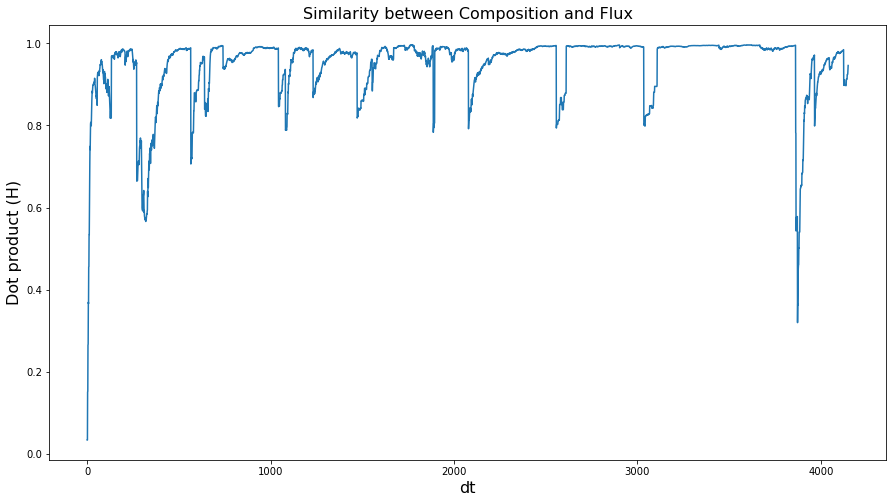

In [24]:
## Plotting Similarity (H) between Composition and Flux
trends = 1
plt.figure(figsize=(15,8))
for counter in range(0,trends):
    df_all_H.iloc[counter].plot()

plt.xlabel('dt',fontsize=16)
plt.ylabel('Dot product (H)',fontsize=16)
plt.title('Similarity between Composition and Flux',fontsize=16)
#plt.legend(range(1,trends+1))
#plt.savefig("figure.png")

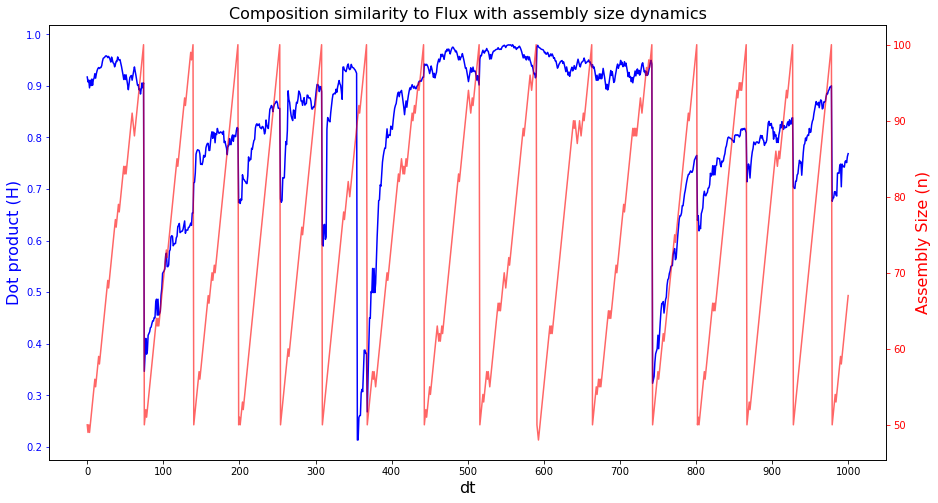

In [25]:
choose_GARD_run_num = 1
x_max_value = 1000

fig, host = plt.subplots(figsize=(15,8))
#fig.subplots_adjust(right=5)
par1 = host.twinx()

p1 = host.plot(df_all_H.iloc[choose_GARD_run_num][:x_max_value+1], 'b-', label='Dot product (H)')
p2 = par1.plot(df_all_assembly_size.iloc[choose_GARD_run_num][:x_max_value+1], 'r-', label='Assembly Size (n)', alpha=0.6)

host.set_xlabel("dt",fontsize=16)
host.set_ylabel("Dot product (H)",fontsize=16)
par1.set_ylabel("Assembly Size (n)",fontsize=16)
plt.title('Composition similarity to Flux with assembly size dynamics', fontsize=16)

host.yaxis.label.set_color('b')
par1.yaxis.label.set_color('r')

plt.xticks(np.arange(0.0, x_max_value+1, 100))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
#host.yaxis.yticks(np.arange(0.0, 1.0, 0.1))
#plt.ticks(np.arange(0.0, 1.0, 0.1))

#tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors='b', grid_alpha=0)#**tkw)
par1.tick_params(axis='y', colors='r', grid_alpha=0)#**tkw)
#par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', grid_alpha=0)#**tkw)

lines = [p1, p2]

#host.legend(lines, [l.get_label() for l in lines])

plt.show()

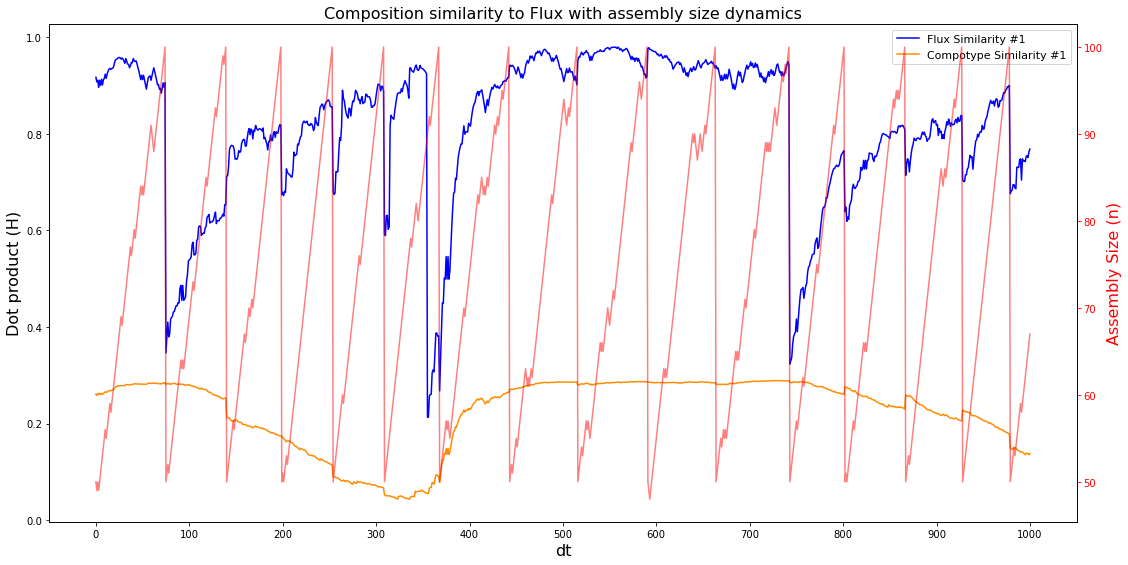

In [26]:
choose_GARD_run_num = 1
x_max_value = 1000

fig, host = plt.subplots(figsize=(15,7.5))
fig.tight_layout()

#fig.subplots_adjust(right=5)
par1 = host.twinx()

p1 = host.plot(df_all_H.iloc[choose_GARD_run_num][:x_max_value+1], 'b', label='Dot product (H)')
p2 = par1.plot(df_all_assembly_size.iloc[choose_GARD_run_num][:x_max_value+1], 'r', label='Assembly Size (n)', alpha=0.5)
p3 = host.plot(df_all_H_compotype.iloc[choose_GARD_run_num][:x_max_value+1], 'darkorange', label='Compotype Similarity')

host.set_xlabel("dt",fontsize=16)
host.set_ylabel("Dot product (H)",fontsize=16)
par1.set_ylabel("Assembly Size (n)",fontsize=16)
plt.title('Composition similarity to Flux with assembly size dynamics', fontsize=16)

host.yaxis.label.set_color('k')
par1.yaxis.label.set_color('r')

plt.xticks(np.arange(0.0, x_max_value+1, 100))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
#host.yaxis.yticks(np.arange(0.0, 1.0, 0.1))
#plt.ticks(np.arange(0.0, 1.0, 0.1))

#tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors='k', grid_alpha=0)#**tkw)
par1.tick_params(axis='y', colors='r', grid_alpha=0)#**tkw)
#par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', grid_alpha=0)#**tkw)

lines = [p1, p2]
l = host.legend(['Flux Similarity #' + str(choose_GARD_run_num), 'Compotype Similarity #' + str(choose_GARD_run_num)], fontsize=11)
l.set_zorder(20)
#host.legend(lines, [l.get_label() for l in lines])

plt.show()

Text(0.5, 1.0, 'Similarity between Composition and Compotype')

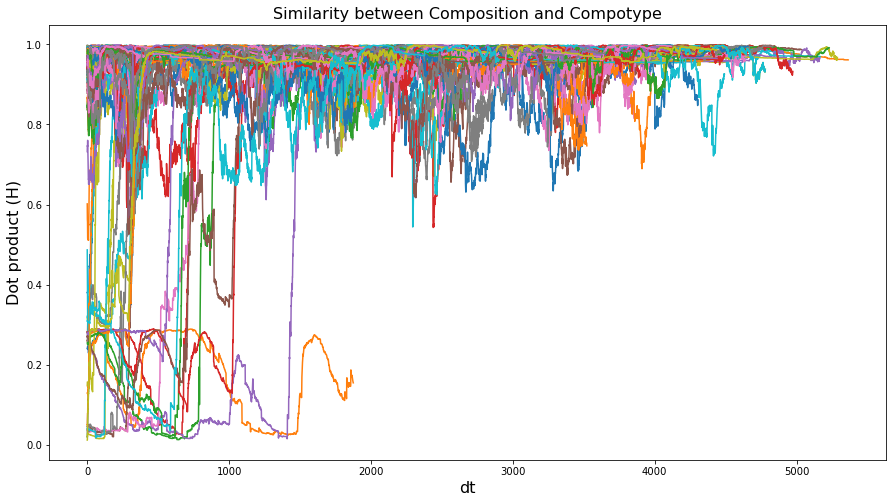

In [27]:
trends = 100
plt.figure(figsize=(15,8))
for counter in range(trends):
    df_all_H_compotype.iloc[counter].plot()

plt.xlabel('dt',fontsize=16)
plt.ylabel('Dot product (H)',fontsize=16)
plt.title('Similarity between Composition and Compotype',fontsize=16)
#plt.legend(range(1,trends+1))
#plt.savefig("figure.png")

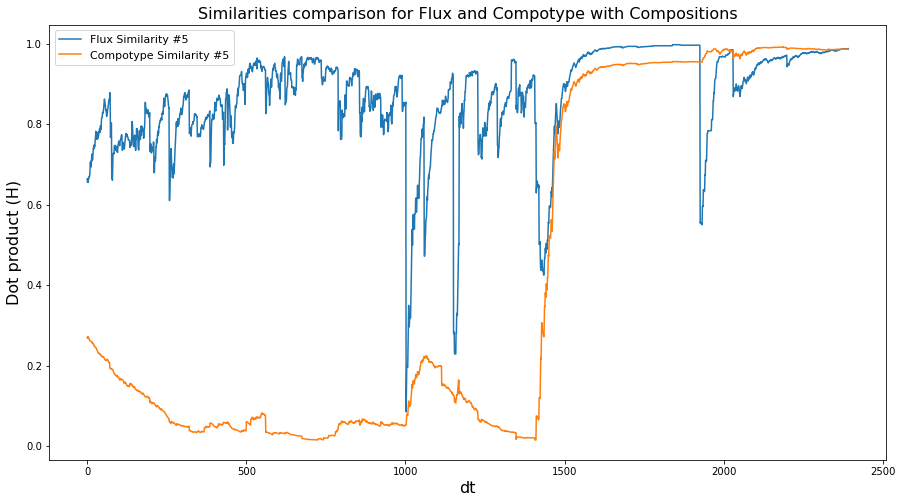

In [28]:
trends = 5
single_trend = True
base_trends = 3 #only when single_trend is False, can be changed.
plt.figure(figsize=(15,8))
legend = []
if single_trend == True:
    base_trends = trends-1
for counter in range(base_trends,trends):
    df_all_H.iloc[counter].plot()
    df_all_H_compotype.iloc[counter].plot()
    legend1 = 'Flux Similarity #' + str(counter+1)
    legend2 = 'Compotype Similarity #' + str(counter+1)
    legend.append(legend1)
    legend.append(legend2)

plt.xlabel('dt',fontsize=16)
plt.ylabel('Dot product (H)',fontsize=16)
plt.title('Similarities comparison for Flux and Compotype with Compositions',fontsize=16)
l = plt.legend(legend, fontsize=11)
#l = set_zorder(20)
#plt.savefig("figure.png")

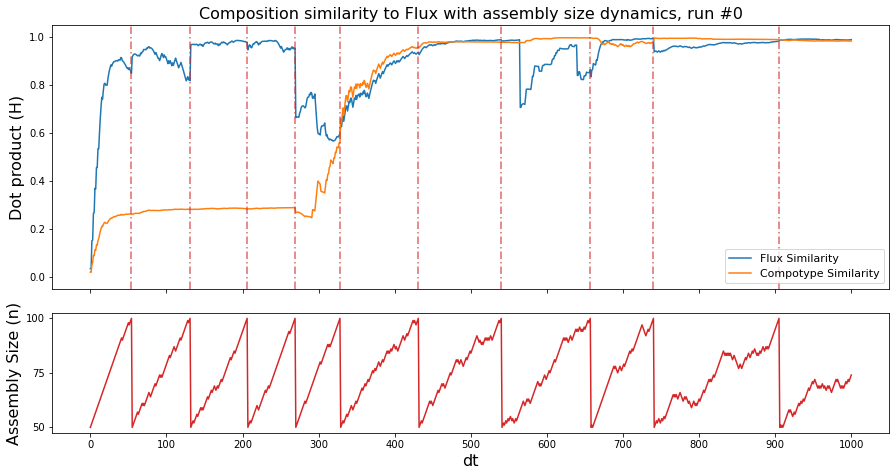

In [446]:
choose_GARD_run_num = 0
x_min_value = 0
x_max_value = 1000
ticks_frequency = 100
generations_lines = True

fig = plt.figure(constrained_layout=True, figsize=(15,7.5))
fig.tight_layout()
gs = fig.add_gridspec(3, 3)

host = fig.add_subplot(gs[0:2, :])
plt.title('Composition similarity to Flux with assembly size dynamics, run #' + str(choose_GARD_run_num), fontsize=16)
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.yticks(np.arange(0.0, 1.1, 0.2))
plt.setp(host.get_xticklabels(), visible=False)

guest = fig.add_subplot(gs[-1,:])
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.yticks(np.arange(50, 101, 25))

#par1 = host.twinx()
p1 = host.plot(df_all_H.iloc[choose_GARD_run_num][:x_max_value+1], '#1f77b4', label='Flux Similarity')
p2 = guest.plot(df_all_assembly_size.iloc[choose_GARD_run_num][:x_max_value+1], '#d62728', label='Assembly Size (n)', alpha=1)
p3 = host.plot(df_all_H_compotype.iloc[choose_GARD_run_num][:x_max_value+1], '#ff7f0e', label='Compotype Similarity')

generations = []
if generations_lines == True:
    for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
        if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
            generations.append(generation_counter)
    for split_time in generations:
        if split_time <= x_max_value and split_time >= x_min_value:
            host.axvline(x=split_time, color='#d62728', dashes=(5,2,1,2), alpha=0.7)

guest.set_xlabel("dt",fontsize=16)
host.set_ylabel("Dot product (H)",fontsize=16)
l = host.legend(['Flux Similarity', 'Compotype Similarity'], fontsize=11)
l.set_zorder(20)

guest.set_ylabel("Assembly Size (n)",fontsize=16)
#host.yaxis.label.set_color('b')
#guest.yaxis.label.set_color('r')

plt.xticks(np.arange(0.0, x_max_value+1, 100))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
#host.yaxis.yticks(np.arange(0.0, 1.0, 0.1))
#plt.ticks(np.arange(0.0, 1.0, 0.1))

#tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', grid_alpha=0)#**tkw)
#par1.tick_params(axis='y', colors='r', grid_alpha=0)#**tkw)
#par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', grid_alpha=0)#**tkw)
guest.tick_params(axis='x', grid_alpha=0)
guest.tick_params(axis='y', grid_alpha=0)
host.set_ylim(-0.05,1.05)

#host.legend(lines, [l.get_label() for l in lines])
plt.show()
#plt.savefig("figure.png")

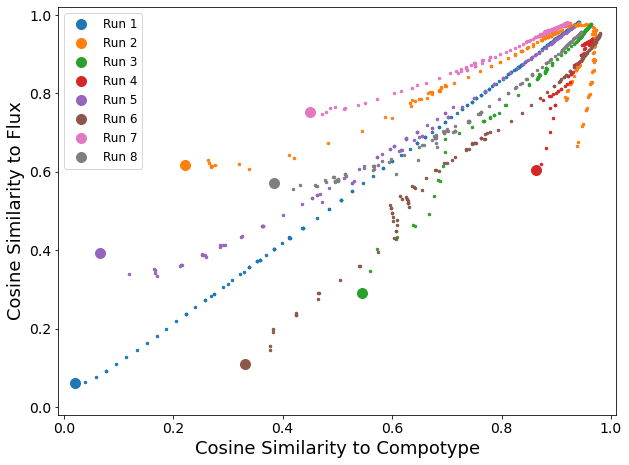

In [704]:
trends = 10
break_generations = False
GARD_run = 0
set_limit = False
# set_stretch = [8,601,1111,1611,2003,2503,3003,3550,4005,4505]
set_stretch = [8,601,2003,3800,19,27,38,23]  #(27,500)
start_values = [24,46,33,71,124,500,604,799]

figure = plt.figure(figsize=(10,7.5))
legend = []
colors = ['tab:blue','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#373e02',
          '#ffc512','#ca0147','aqua','#63a950','mango','#016795','#bc13fe']

if manual_initial_conditions:
    df_all_H_compotype_sorted = df_all_H_compotype.sort_values(by=[0], ascending=True)
    stretch = np.linspace(0,df_all_H_compotype_sorted.shape[0],trends+1)
    stretch = [int(x+5) for x in stretch]
    if set_stretch != False:
        stretch = set_stretch
#     print(stretch)
#     pos_values = [df_all_H_compotype_sorted.iloc[x,0] for x in stretch[:-1]]
#     print(pos_values)
    for run_num_idx, run_num in enumerate(stretch):
        run_num = int(run_num)
        real_index = list(df_all_H_compotype_sorted.index)[run_num]
        if set_limit != False:
            plt.plot(df_all_H_compotype_sorted.iloc[run_num,start_values[run_num_idx]:set_limit],
                     df_all_H.iloc[real_index,start_values[run_num_idx]:set_limit],'o', markersize=2,
                     color=colors[run_num_idx], label='Run #' + str(run_num_idx))
            plt.plot(df_all_H_compotype_sorted.iloc[run_num,start_values[run_num_idx]],
                     df_all_H.iloc[real_index,start_values[run_num_idx]],
                     'o', markersize=10, color=colors[run_num_idx])
        else:
            compotype_similarity_list = list(df_all_H_compotype_sorted.iloc[run_num])
            flux_similarity_list = list(df_all_H.iloc[real_index])
            assembly_size_list = list(df_all_assembly_size.iloc[real_index])
            step_counter = 0
            finish_line = 0
            for a,b,c in zip (compotype_similarity_list,flux_similarity_list,assembly_size_list):
#                 print(a,b)
                if a >= 0.92 and b >= 0.92 and c==100:
                    finish_line = step_counter
                    break
                else:
                    step_counter += 1
            else:
                print(str(run_num) + ' not reached compotype')
            plt.plot(df_all_H_compotype_sorted.iloc[run_num,start_values[run_num_idx]:finish_line],
                     df_all_H.iloc[real_index,start_values[run_num_idx]:finish_line], 'o', markersize=2.5,
                     color=colors[run_num_idx], label='Run ' + str(run_num_idx+1))
            plt.plot(df_all_H_compotype_sorted.iloc[run_num,start_values[run_num_idx]],
                     df_all_H.iloc[real_index,start_values[run_num_idx]],
                     'o', markersize=10, color=colors[run_num_idx])
else:
    for run_num in range(trends):
        plt.plot(df_all_H_compotype.iloc[run_num], df_all_H.iloc[run_num], 'o', markersize=1.2, color=colors[run_num])
        #label = 'Simulation run #' + str(run_num+1)
        #legend.append(label)


plt.ylabel('Cosine Similarity to Flux',fontsize=18)
plt.xlabel('Cosine Similarity to Compotype',fontsize=18)
# plt.title('Relation between Compotype and Flux - Progression',fontsize=16)
plt.xlim(-0.01,1.01)
plt.ylim(-0.02,1.02)
plt.legend(fontsize=12, markerscale=4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("Phase Diagram - Progression.pdf")

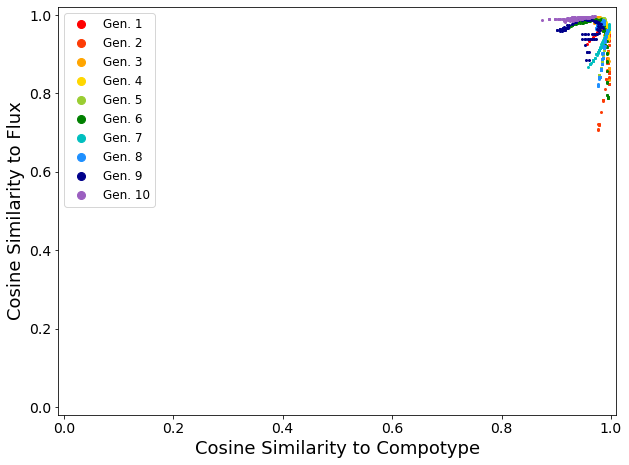

In [716]:
'''Only splits at compotype'''
trends = 1
break_generations = False
#choose_GARD_run_num = 2
GARD_run = 0
figure = plt.figure(figsize=(10,7.5))
top = 10
legend = []
colors = ['maroon', 'r', 'orange', 'gold', 'yellowgreen', 'green', 'c', 'dodgerblue', 'darkblue', 'purple']
colors = ['#410200','#a03623','r','#fd3c06','orange','gold','#cdc50a','yellowgreen','green','#35ab6d','c','dodgerblue','darkblue','purple','#9b5fc0','#cea2fd','#a8a495','k']
colors = ['r','#fd3c06','orange','gold','yellowgreen','green','c','dodgerblue','darkblue','#9b5fc0','#cea2fd','#a8a495','k']


compotype_similarity_list = list(df_all_H_compotype.iloc[GARD_run])
flux_similarity_list = list(df_all_H.iloc[GARD_run])
assembly_size_list = list(df_all_assembly_size.iloc[GARD_run])
step_counter = 0
finish_line = 0
for a,b,c in zip (compotype_similarity_list,flux_similarity_list,assembly_size_list):
    if a >= 0.9 and b >= 0.9 and c==100:
        starting_line = step_counter+1
        break
    else:
        step_counter += 1
else:
    print(str(run_num) + ' not reached compotype')


generations = []
for generation_counter in range(len(list(df_all_assembly_size.iloc[GARD_run]))):
    if df_all_assembly_size[generation_counter].iloc[GARD_run] == 100:
        generations.append(generation_counter)
base = starting_line
color_count = 0
draw_gen_counter = 0
for counter, generation in enumerate(generations):
    if draw_gen_counter >= top:
        break
    if base > generation:
        continue
    plt.plot(df_all_H_compotype.iloc[GARD_run,base:generation+1], df_all_H.iloc[GARD_run,base:generation+1], 'o',
             color=colors[color_count], markersize=2, label=('Gen. ' + str(draw_gen_counter+1)))
#     plt.plot(df_all_H_compotype.iloc[GARD_run,base], df_all_H.iloc[GARD_run,base],
#                      'o', markersize=8, color=colors[color_count])
    base = generation +1
    color_count+=1
    draw_gen_counter+=1
plt.legend(fontsize=12, markerscale=4)
plt.xlim(-0.01,1.01)
plt.ylim(-0.02,1.02)
    
    
plt.ylabel('Cosine Similarity to Flux',fontsize=18)
plt.xlabel('Cosine Similarity to Compotype',fontsize=18)
# plt.title('Relation between Compotype and Flux - Splits',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("Phase Diagram - Splits.pdf")

In [375]:
df_all_H_compotype_sorted

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
1968,0.000370,0.000986,0.001014,0.001628,0.001655,0.001666,0.001692,0.002304,0.002329,0.002344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.000389,0.000411,0.000424,0.000459,0.000476,0.000489,0.000501,0.000700,0.000708,0.001865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,0.000416,0.000615,0.000674,0.000794,0.000805,0.000813,0.000826,0.001024,0.001082,0.001120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,0.000427,0.000437,0.000468,0.000498,0.000529,0.000550,0.000581,0.000671,0.000702,0.000731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,0.000430,0.000629,0.000640,0.000761,0.000772,0.000819,0.000829,0.000892,0.000902,0.000911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.997345,0.997206,0.996915,0.996532,0.995702,0.994828,0.994735,0.993619,0.990991,0.992538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,0.997411,0.996805,0.995326,0.994332,0.992179,0.990528,0.986956,0.984475,0.979456,0.978865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1559,0.997530,0.997327,0.997017,0.996582,0.995082,0.994141,0.991358,0.989766,0.985661,0.985162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,0.997634,0.997540,0.997352,0.997053,0.995500,0.994701,0.991850,0.990404,0.986214,0.988142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
df_all_assembly_size

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.0,49.0,50.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50.0,49.0,50.0,49.0,50.0,49.0,50.0,49.0,50.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50.0,49.0,50.0,49.0,50.0,49.0,50.0,49.0,50.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50.0,49.0,50.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[0.000470297546690915, 0.11540186479586435, 0.18422811104402642, 0.2622136226590003, 0.3373911895889929, 0.4288454619617231, 0.5566165627243368, 0.6987013310443287, 0.8278393957707849]


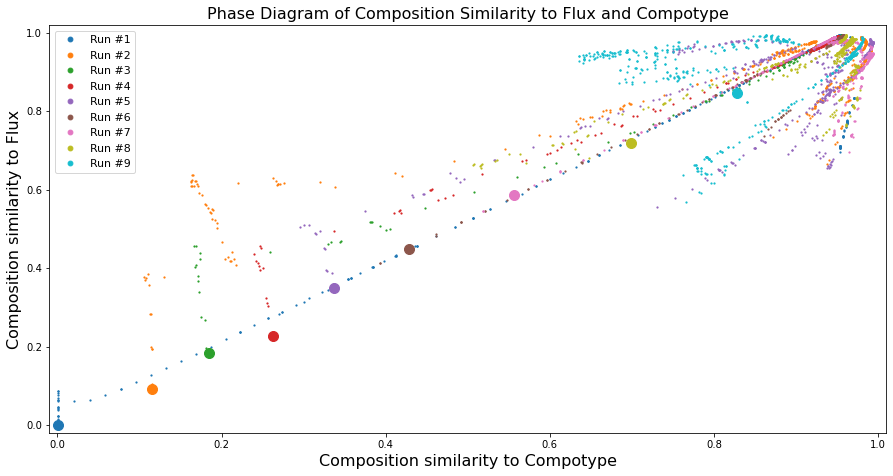

In [326]:
trends = 10
break_generations = False
GARD_run = 0
set_limit = 500
set_stretch = [8,601,2009,3003,3550,3891,4005,4049,4103]


figure = plt.figure(figsize=(15,7.5))
legend = []
colors = ['tab:blue','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#bcbd22','#17becf','#373e02',
          '#ffc512','#ca0147','aqua','#63a950','mango','#016795','#bc13fe']

if manual_initial_conditions:
    df_all_H_compotype_sorted = df_all_H_compotype.sort_values(by=[0], ascending=True)
    stretch = np.linspace(0,df_all_H_compotype_sorted.shape[0],trends+1)
    stretch = [int(x+5) for x in stretch]
    if set_stretch != False:
        stretch = set_stretch
        pos_values = [df_all_H_compotype_sorted.iloc[x,0] for x in stretch]
        print(pos_values)
#     print(stretch)
#     pos_values = [df_all_H_compotype_sorted.iloc[x,0] for x in stretch[:-1]]
#     print(pos_values)
    for run_num_idx, run_num in enumerate(stretch):
        run_num = int(run_num)
        real_index = list(df_all_H_compotype_sorted.index)[run_num]
        if set_limit != False:
            plt.plot(df_all_H_compotype_sorted.iloc[run_num,:set_limit], df_all_H.iloc[real_index,:set_limit],
                     'o', markersize=1.2, color=colors[run_num_idx], label='Run #' + str(run_num_idx+1))
            plt.plot(df_all_H_compotype_sorted.iloc[run_num,0], df_all_H.iloc[real_index,0],
                     'o', markersize=10, color=colors[run_num_idx])
        else:
            plt.plot(df_all_H_compotype_sorted.iloc[run_num,], df_all_H.iloc[real_index], 'o', markersize=1.2,
                     color=colors[run_num_idx], label='Run #' + str(run_num_idx))
else:
    for run_num in range(trends):
        plt.plot(df_all_H_compotype.iloc[run_num], df_all_H.iloc[run_num], 'o', markersize=1.2, color=colors[run_num])
        #label = 'Simulation run #' + str(run_num+1)
        #legend.append(label)


plt.ylabel('Composition similarity to Flux',fontsize=16)
plt.xlabel('Composition similarity to Compotype',fontsize=16)
plt.title('Phase Diagram of Composition Similarity to Flux and Compotype',fontsize=16)
plt.xlim(-0.01,1.01)
plt.ylim(-0.02,1.02)
plt.legend(fontsize=11, markerscale=4)
#plt.savefig("figure.png")

In [53]:
run_num

5120

In [54]:
stretch

array([   0.,  640., 1280., 1920., 2560., 3200., 3840., 4480., 5120.,
       5760., 6400.])

In [51]:
df_all_H

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0.034350,0.034332,0.151045,0.153019,0.265258,0.267836,0.369599,0.366281,0.455538,0.456472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.917167,0.907650,0.910864,0.896068,0.910864,0.900521,0.913136,0.901071,0.912004,0.914866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.967632,0.963712,0.959674,0.951158,0.959674,0.951158,0.959674,0.951158,0.959674,0.961005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.946874,0.932395,0.919806,0.900202,0.919806,0.900202,0.919806,0.900202,0.919806,0.918199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.664470,0.655526,0.664470,0.655526,0.664470,0.664545,0.670151,0.669072,0.674905,0.688368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.042090,0.071529,0.191371,0.191859,0.304449,0.326518,0.426843,0.440063,0.526115,0.524168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,0.162851,0.161057,0.270419,0.269072,0.368971,0.390135,0.477558,0.490648,0.565093,0.564134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,0.373846,0.378749,0.435051,0.439609,0.467217,0.515764,0.514499,0.510503,0.520389,0.519623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,0.266981,0.271314,0.360678,0.372050,0.390302,0.397873,0.394195,0.393266,0.394646,0.395029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


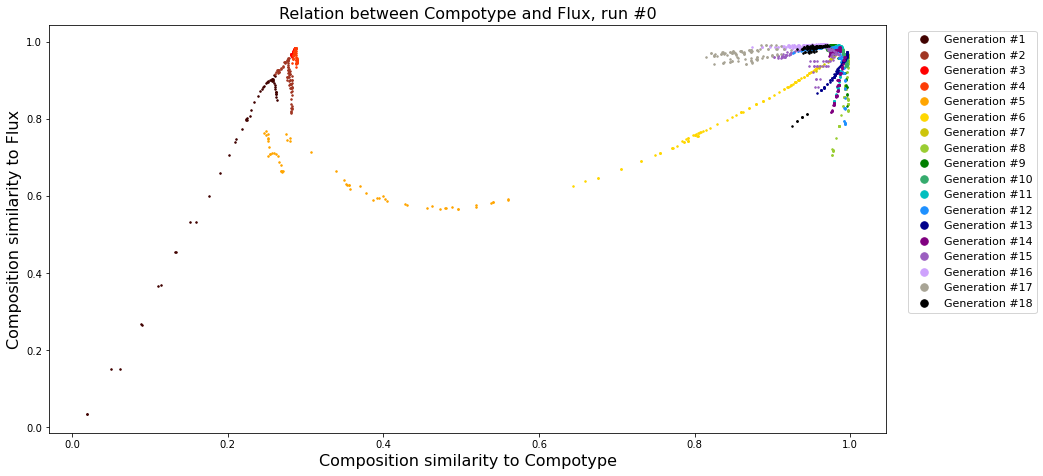

In [39]:
trends = 1
break_generations = True
#choose_GARD_run_num = 2
GARD_run = 0
figure = plt.figure(figsize=(15,7.5))
top = 18
legend = []
colors = ['maroon', 'r', 'orange', 'gold', 'yellowgreen', 'green', 'c', 'dodgerblue', 'darkblue', 'purple']
colors = ['#410200','#a03623','r','#fd3c06','orange','gold','#cdc50a','yellowgreen','green','#35ab6d','c','dodgerblue','darkblue','purple','#9b5fc0','#cea2fd','#a8a495','k']


#for counter in range(base_trends,trends):
#    df_all_H.iloc[counter].plot()
#    df_all_H_compotype.iloc[counter].plot()

if break_generations == False:
    for run_num in range(trends):
        plt.plot(df_all_H_compotype.iloc[run_num], df_all_H.iloc[run_num], 'o', markersize=1.5)
        #label = 'Simulation run #' + str(run_num+1)
        #legend.append(label)
else:
    generations = []
    for generation_counter in range(len(list(df_all_assembly_size.iloc[GARD_run]))):
        if df_all_assembly_size[generation_counter].iloc[GARD_run] == 100:
            generations.append(generation_counter)
    base = 0
    for counter, generation in enumerate(generations):
        if counter >= top:
            break
        plt.plot(df_all_H_compotype.iloc[GARD_run,base:generation+1], df_all_H.iloc[GARD_run,base:generation+1], 'o', color=colors[counter], markersize=1.5, label=('Generation #' + str(counter+1)))
        base = generation +1
#plt.grid(False)

plt.ylabel('Composition similarity to Flux',fontsize=16)
plt.xlabel('Composition similarity to Compotype',fontsize=16)
plt.title('Relation between Compotype and Flux, run #' + str(GARD_run),fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=11, markerscale=5)
#plt.savefig("figure.png")

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4146,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4147,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4148,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,0,1,2
0,0.911225,-0.248698,0.257270
1,0.917322,-0.161660,0.290768
2,0.919265,-0.176902,0.282552
3,0.920627,-0.190311,0.275441
4,0.921546,-0.202174,0.269247
...,...,...,...
1926,0.018660,-0.179810,-0.056927
1927,0.009524,-0.177533,-0.054587
1928,0.022238,-0.184125,-0.056128
1929,0.013253,-0.181856,-0.053884


[[ 6.51155018e-23  2.53028968e-02  8.91701763e-02  2.52834823e-02
  -1.42000940e-33 -2.97495625e-03  5.41645364e-03 -1.84205335e-34
   8.04946748e-03  4.06712764e-34 -1.18943515e-34  8.28565413e-05
   8.28565413e-05  0.00000000e+00  8.13232402e-03  0.00000000e+00
   0.00000000e+00 -2.18239758e-03  2.11933829e-04  1.61031465e-02
   0.00000000e+00  2.29813105e-02  1.79940905e-02  0.00000000e+00
  -7.72556464e-01  0.00000000e+00  1.60202900e-02  0.00000000e+00
  -2.37445530e-02  0.00000000e+00 -5.34106804e-03  2.72383867e-03
   8.28565413e-05  1.65713083e-04 -3.16767429e-04 -1.05674743e-03
   1.26082774e-02  1.60202900e-02  1.29666354e-03  0.00000000e+00
   9.34359208e-03  8.04946748e-03  0.00000000e+00  1.61031465e-02
   1.60202900e-02  1.65713083e-04  0.00000000e+00  2.85912636e-05
   0.00000000e+00  1.91798186e-02  0.00000000e+00  0.00000000e+00
   1.38909102e-03  0.00000000e+00  7.98300449e-04  1.48679056e-02
   1.30469118e-02  8.91773504e-03 -1.22233630e-04  1.65713083e-04
   4.03171

<Figure size 1080x540 with 0 Axes>

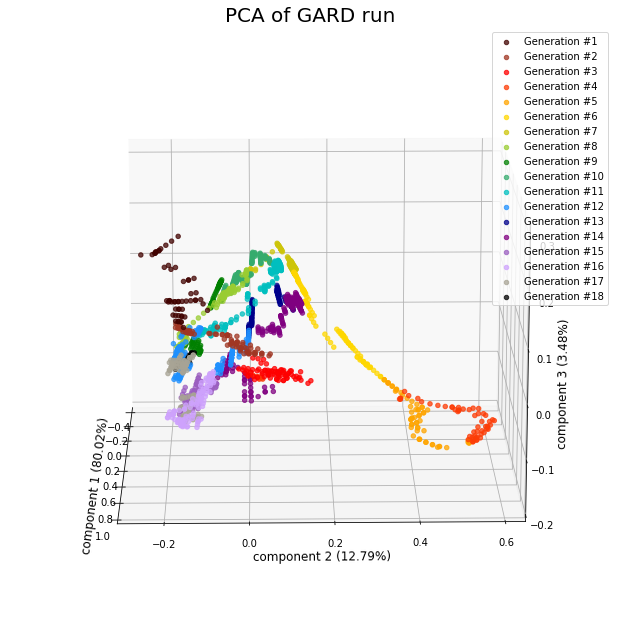

In [423]:
'''3-components PCA'''
trends = 1
break_generations = True
GARD_run = 0
figure = plt.figure(figsize=(15,7.5))
top = 18
bottom = 0
legend = []
colors = ['maroon', 'r', 'orange', 'gold', 'yellowgreen', 'green', 'c', 'dodgerblue', 'darkblue', 'purple']
colors = ['#410200','#a03623','r','#fd3c06','orange','gold','#cdc50a','yellowgreen','green','#35ab6d','c','dodgerblue','darkblue','purple','#9b5fc0','#cea2fd','#a8a495','k']


df_comp = pd.DataFrame(data['compositions'][0][GARD_run].T)
display(df_comp)
generations = []
for generation_counter in range(len(list(df_all_assembly_size.iloc[GARD_run]))):
    if df_all_assembly_size[generation_counter].iloc[GARD_run] == 100:
        generations.append(generation_counter)


df_comp_mod = deepcopy(df_comp)
df_comp_mod = df_comp_mod.iloc[generations[bottom]:generations[top-1],:]
for row_idx in range(df_comp_mod.shape[0]):
    row_array = np.array(df_comp_mod.iloc[row_idx,:])
    row_array_norm = np.linalg.norm(row_array)
    row_array = row_array / row_array_norm
#     print(row_array)
    df_comp_mod.iloc[row_idx,:] = row_array

pca = PCA(n_components=3)
projected = pca.fit_transform(df_comp_mod)
df_projected = pd.DataFrame(projected)
display(df_projected)
# df_projected['H'] = list(df_ordered_comp_with_H_mod_both['H'])
# df_projected = df_projected.sort_values(by=['H'])

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
# plt.style.use('default')

base = 0
for counter, generation in enumerate(generations):
    if counter < bottom:
        base = generation + 1
        continue
    if counter >= top:
        break
    plot_scatter = ax.scatter(df_projected.iloc[base:generation+1,0],df_projected.iloc[base:generation+1,1],
                              df_projected.iloc[base:generation+1,2], c=colors[counter], alpha=0.75,
                              label='Generation #' + str(counter+1))
    base = generation +1



# labels_ind = ([1]*len(list(component1_worst))) + ([0]*len(list(component1_best)))
# cmap = sns.color_palette("tab10")
# cmap_colors = [cmap[x] for x in labels_ind]
# labels = ['Best ' + str(samples_per_best) + ' Reproducers', 'Worst ' + str(samples_for_worst) + ' Reproducers']


xlabel_fix = ax.set_xlabel('component 1 (' + str(round(100*pca.explained_variance_ratio_[0],2)) + '%)', fontsize=12)
ylabel_fix = ax.set_ylabel('component 2 (' + str(round(100*pca.explained_variance_ratio_[1],2)) + '%)', fontsize=12)
zlabel_fix = ax.set_zlabel('component 3 (' + str(round(100*pca.explained_variance_ratio_[2],2)) + '%)', fontsize=12)
title_fix = plt.title('PCA of GARD run', fontsize=20)
# blue_marker = patches.Circle(0.1,color=cmap[0])
# orange_marker = patches.Circle(0.1,color=cmap[1])
# plt.legend([blue_marker,orange_marker],labels)
ax.legend()
plt.tight_layout()
with imageio.get_writer('movie.gif', mode='I') as writer:
    for ii in range(0,360,1):
        ax.view_init(elev=15., azim=ii)
        filename = "movie%d.png" % ii
        plt.savefig(filename)
        filename1 = "movie%d.pdf" % ii
        plt.savefig(filename1)
        image = imageio.imread(filename)
        writer.append_data(image)
print(pca.components_)
print(pca.explained_variance_)

,0,1,2
0,0.227977,0.098570,-0.129562
1,0.227720,0.098120,-0.130602
2,0.152430,0.050893,-0.173433
3,0.136948,0.025738,-0.097747
4,0.062949,-0.017296,-0.139827
...,...,...,...
3488,0.713295,-0.005479,-0.154532
3489,0.712655,-0.005028,-0.153136
3490,0.711701,-0.004483,-0.151777
3491,0.710669,-0.004298,-0.149560


[[ 9.30922077e-03  3.74436486e-03 -1.81610064e-02 -1.35229889e-02
  -6.65931622e-29  7.03576272e-04  8.38327364e-04  1.34886771e-02
   1.31183058e-02  1.17093197e-03  1.24143657e-02  5.00440452e-02
   2.41601988e-04  9.21463357e-03  1.78443869e-03  2.24052769e-03
   9.56343794e-03  7.44159056e-03  3.79569197e-04 -6.93088858e-03
   4.82953654e-03 -2.16795552e-04 -2.11196337e-02  8.75278293e-04
  -1.87602408e-01  1.72571637e-03 -9.49235567e-04  1.51317890e-03
   1.50122477e-02  1.40282215e-02  1.82035566e-03  3.78297429e-03
   5.43978622e-03  5.03868217e-03  1.09992471e-02 -4.69277993e-04
   5.58413527e-03  1.16122516e-02  2.94441107e-02  8.57463828e-03
   1.14964855e-04  1.34156953e-02 -7.29217526e-04  1.61298729e-02
   8.25103817e-03 -6.03911961e-04  0.00000000e+00  5.62076097e-03
   2.19770369e-02 -1.90408096e-02 -2.62033255e-04  2.82674053e-03
   3.39655257e-03  3.64135893e-03  7.52651590e-02 -1.42888816e-02
  -8.06644079e-03  1.75401024e-02  7.12371047e-03 -1.72606632e-03
   2.75153

<Figure size 1080x540 with 0 Axes>

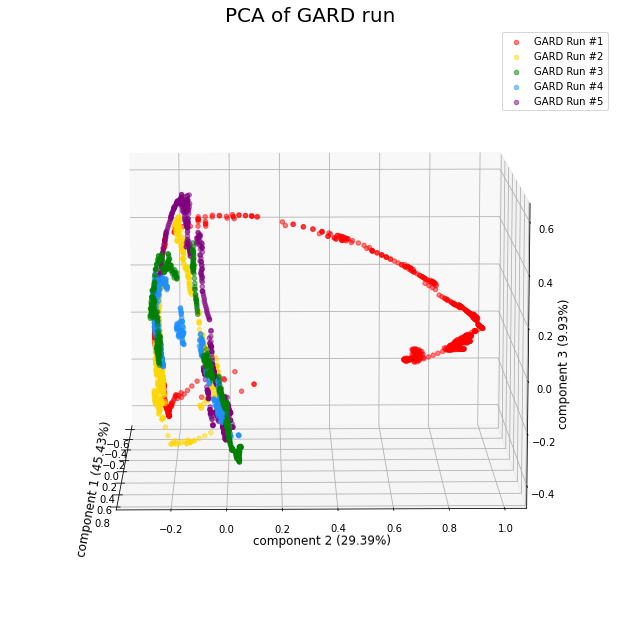

In [424]:
'''3-components PCA'''
trends = 1
break_generations = True
GARD_runs = 5
figure = plt.figure(figsize=(15,7.5))
top = 10
# legend = []
colors = ['r','gold','green','dodgerblue','purple']
# colors = ['#410200','#a03623','r','#fd3c06','orange','gold','#cdc50a','yellowgreen','green','#35ab6d','c','dodgerblue','darkblue','#cea2fd','purple','#cb0162','#a8a495','k']

cmap = sns.color_palette("tab10")
jump_scale = 5  # the steps to record.

once = True
generations = {}
baseline = 0
starts = []
for gard_run in range(GARD_runs):
    df_comp = pd.DataFrame(data['compositions'][0][gard_run].T)
    generations[gard_run] = []
    for generation_counter in range(len(list(df_all_assembly_size.iloc[gard_run]))):
        if df_all_assembly_size[generation_counter].iloc[gard_run] == 100:
            generations[gard_run].append(generation_counter)

    df_comp_mod = deepcopy(df_comp)
    df_comp_mod = df_comp_mod.iloc[:generations[gard_run][top-1],:]
    for row_idx in range(df_comp_mod.shape[0]):
        row_array = np.array(df_comp_mod.iloc[row_idx,:])
        row_array_norm = np.linalg.norm(row_array)
        row_array = row_array / row_array_norm
        #     print(row_array)
        df_comp_mod.iloc[row_idx,:] = row_array
#     display(df_comp_mod)
    generations[gard_run] = [x+baseline for x in generations[gard_run]]
    starts.append(baseline)
    baseline += df_comp_mod.shape[0]
    
    if once:
        df_all_comps = deepcopy(df_comp_mod)
        once = False
    else:
        df_all_comps = df_all_comps.append(df_comp_mod, ignore_index=True)

pca = PCA(n_components=3)
projected = pca.fit_transform(df_all_comps)
df_projected = pd.DataFrame(projected)
display(df_projected)

# print(starts)
# print(generations)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

base = 0
for gard_run_counter,gard_run in enumerate(list(range(GARD_runs))):
#     print(list(df_projected.iloc[starts[gard_run_counter]:generations[gard_run][top-1],0])[:10])
    plot_scatter = ax.scatter(df_projected.iloc[starts[gard_run_counter]:generations[gard_run][top-1],0],
                              df_projected.iloc[starts[gard_run_counter]:generations[gard_run][top-1],1],
                              df_projected.iloc[starts[gard_run_counter]:generations[gard_run][top-1],2],
                              c=colors[gard_run_counter], alpha=0.5, label='GARD Run #' + str(gard_run_counter+1))
    
    
xlabel_fix = ax.set_xlabel('component 1 (' + str(round(100*pca.explained_variance_ratio_[0],2)) + '%)', fontsize=12)
ylabel_fix = ax.set_ylabel('component 2 (' + str(round(100*pca.explained_variance_ratio_[1],2)) + '%)', fontsize=12)
zlabel_fix = ax.set_zlabel('component 3 (' + str(round(100*pca.explained_variance_ratio_[2],2)) + '%)', fontsize=12)
title_fix = plt.title('PCA of GARD run', fontsize=20)
# blue_marker = patches.Circle(0.1,color=cmap[0])
# orange_marker = patches.Circle(0.1,color=cmap[1])
# plt.legend([blue_marker,orange_marker],labels)
ax.legend()
plt.tight_layout()
with imageio.get_writer('movie.gif', mode='I') as writer:
    for ii in range(0,360,1):
        ax.view_init(elev=10., azim=ii)
        filename = "movie%d.png" % ii
        plt.savefig(filename)
        filename1 = "movie%d.pdf" % ii
        plt.savefig(filename1)
        image = imageio.imread(filename)
        writer.append_data(image)
print(pca.components_)
print(pca.explained_variance_)

7


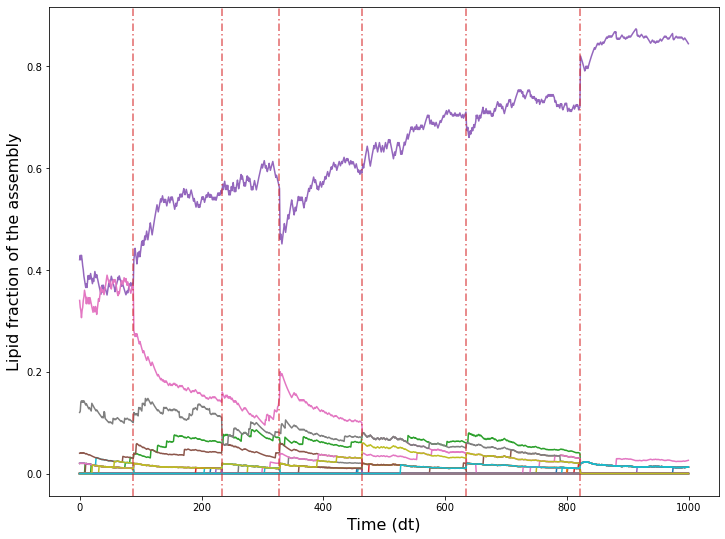

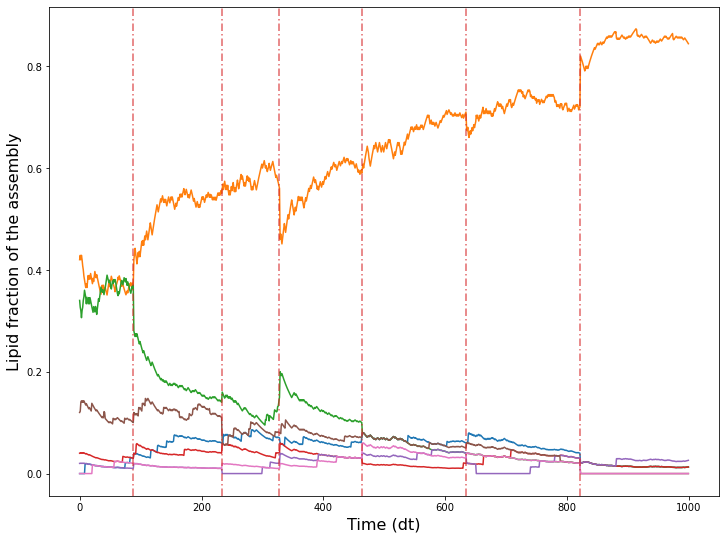

In [425]:
GARD_run = 11
steps=1000
x_min_value = 0

df_comp = pd.DataFrame(data['compositions'][0][GARD_run].T)
# display(df_comp)

for row_idx in range(df_comp.shape[0]):
    row = list(df_comp.iloc[row_idx,:])
    magnitude = sum(row)
    new_row = np.array(row)/magnitude
    df_comp.iloc[row_idx,:] = new_row
# display(df_comp)

fig, ax = plt.subplots(figsize=(12,9))

for column_idx in range(df_comp.shape[1]):
    if steps != False:
        column = list(df_comp.iloc[:steps,column_idx])
    else:
        column = list(df_comp.iloc[:,column_idx])
    plt.plot(column)

# plt.ylim(0,1)
plt.ylabel('Lipid fraction of the assembly', fontsize=16)
plt.xlabel('Time (dt)', fontsize=16)
# ax.set_yscale('log')


generations = []
if generations_lines == True:
    for generation_counter in range(len(list(df_all_assembly_size.iloc[GARD_run]))):
        if df_all_assembly_size[generation_counter].iloc[GARD_run] == 100:
            generations.append(generation_counter)
    for split_time in generations:
        if split_time <= steps and split_time >= x_min_value:
            plt.axvline(x=split_time, color='#d62728', dashes=(5,2,1,2), alpha=0.7)

            

'''Do the same but only for Nmol'''
positions = []
for pos_idx, pos in enumerate(compotype_beta):
    if pos>=1:
        positions.append(pos_idx)
print(len(positions))

fig, ax = plt.subplots(figsize=(12,9))

for column_idx in range(df_comp.shape[1]):
    if column_idx not in positions:
        continue
    if steps != False:
        column = list(df_comp.iloc[:steps,column_idx])
    else:
        column = list(df_comp.iloc[:,column_idx])
    plt.plot(column)

# plt.ylim(0,1)
plt.ylabel('Lipid fraction of the assembly', fontsize=16)
plt.xlabel('Time (dt)', fontsize=16)
# ax.set_yscale('log')


generations = []
if generations_lines == True:
    for generation_counter in range(len(list(df_all_assembly_size.iloc[GARD_run]))):
        if df_all_assembly_size[generation_counter].iloc[GARD_run] == 100:
            generations.append(generation_counter)
    for split_time in generations:
        if split_time <= steps and split_time >= x_min_value:
            plt.axvline(x=split_time, color='#d62728', dashes=(5,2,1,2), alpha=0.7)

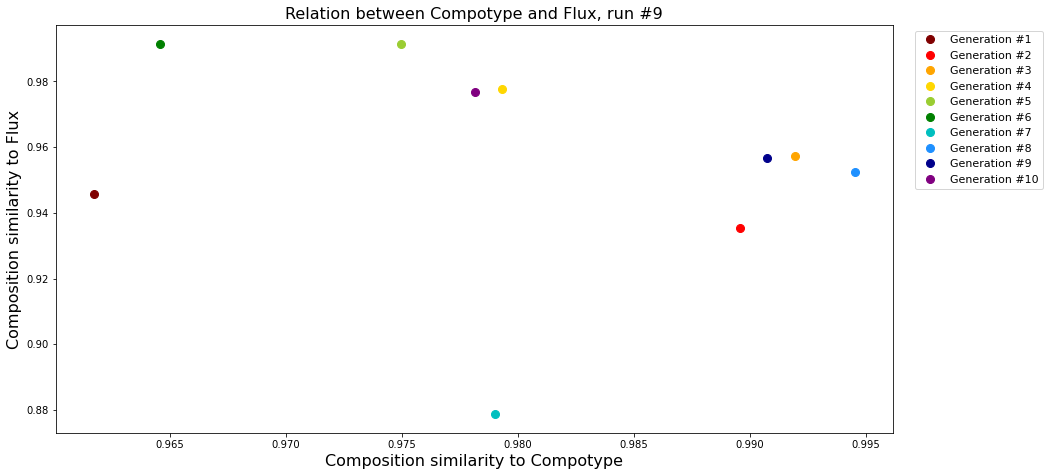

In [426]:
trends = 1
break_generations = True
GARD_run = 9
figure = plt.figure(figsize=(15,7.5))
top = 10
legend = []
colors = ['maroon', 'r', 'orange', 'gold', 'yellowgreen', 'green', 'c', 'dodgerblue', 'darkblue', 'purple']

#for counter in range(base_trends,trends):
#    df_all_H.iloc[counter].plot()
#    df_all_H_compotype.iloc[counter].plot()

if break_generations == False:
    for run_num in range(trends):
        plt.plot(df_all_H_compotype.iloc[run_num], df_all_H.iloc[run_num], 'o', markersize=1.5)
        #label = 'Simulation run #' + str(run_num+1)
        #legend.append(label)
else:
    generations = []
    if generations_lines == True:
        for generation_counter in range(len(list(df_all_assembly_size.iloc[GARD_run]))):
            if df_all_assembly_size[generation_counter].iloc[GARD_run] == 100:
                generations.append(generation_counter)
    base = 0
    for counter, generation in enumerate(generations):
        if counter >= top:
            break
        plt.plot(np.mean(df_all_H_compotype.iloc[GARD_run,base:generation+1]), np.mean(df_all_H.iloc[GARD_run,base:generation+1]), 'o', color=colors[counter], markersize=8, label=('Generation #' + str(counter+1)))
        base = generation +1
#plt.grid(False)

plt.ylabel('Composition similarity to Flux',fontsize=16)
plt.xlabel('Composition similarity to Compotype',fontsize=16)
plt.title('Relation between Compotype and Flux, run #' + str(GARD_run),fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=11, markerscale=1)
#plt.savefig("figure.png")

In [ ]:
df_all_H_compotype

In [ ]:
'''Plot fraction of replicators over generations'''
threshold = 0.9

figure = plt.figure(figsize=(15,7.5))

rep_frac_dict = {}
for GARD_run in range(df_all_assembly_size.shape[0]):
    rep_frac_dict[GARD_run] = []
    generations = []
    for generation_counter in range(len(list(df_all_assembly_size.iloc[GARD_run]))):
        if df_all_assembly_size[generation_counter].iloc[GARD_run] == 100:
            generations.append(generation_counter)
    base = 0
    for gen_counter,gen_step in enumerate(generations):
        similarity_compotype_mean = np.nanmean(df_all_H_compotype.iloc[GARD_run,base:gen_step+1])
        similarity_flux_mean = np.nanmean(df_all_H.iloc[GARD_run,base:gen_step+1])
        base = gen_step
        if similarity_compotype_mean >= threshold and similarity_flux_mean >= threshold:
            rep_frac_dict[GARD_run].append(1)
        else:
            rep_frac_dict[GARD_run].append(0)

df_rep_frac_results = pd.DataFrame(rep_frac_dict).T
df_rep_frac_results.to_csv("df_rep_frac_results.csv", index=None, header=None)
df_rep_frac_results = df_rep_frac_results.sum().div(df_all_assembly_size.shape[0])

plt.plot(range(1, len(list(df_rep_frac_results))+1), df_rep_frac_results, ':o', markersize=5)

#rep_frac_dict_2 = {}
#for GARD_run in range(df_all_assembly_size_2.shape[0]):
#    rep_frac_dict_2[GARD_run] = []
#    generations_2 = []
#    for generation_counter in range(len(list(df_all_assembly_size_2.iloc[GARD_run]))):
#        if df_all_assembly_size_2[generation_counter].iloc[GARD_run] == 100:
#            generations_2.append(generation_counter)
#    base = 0
#    for gen_counter,gen_step in enumerate(generations_2):
#        similarity_compotype_mean = np.nanmean(df_all_H_compotype_2.iloc[GARD_run,base:gen_step+1])
#        similarity_flux_mean = np.nanmean(df_all_H_2.iloc[GARD_run,base:gen_step+1])
#        base = gen_step
#        if similarity_compotype_mean >= threshold and similarity_flux_mean >= threshold:
#            rep_frac_dict_2[GARD_run].append(1)
#        else:
#            rep_frac_dict_2[GARD_run].append(0)
#
#df_rep_frac_results_2 = pd.DataFrame(rep_frac_dict_2).T
#df_rep_frac_results_2.to_csv("df_rep_frac_results_2.csv", index=None, header=None)
#df_rep_frac_results_2 = df_rep_frac_results_2.sum().div(df_all_assembly_size_2.shape[0])
#
#plt.plot(range(1, len(list(df_rep_frac_results_2))+1), df_rep_frac_results_2, ':o', markersize=5)

#plt.xlim(1,df_rep_frac_results.shape[0])
plt.ylabel('Fraction of Replicators',fontsize=16)
plt.xlabel('Generations',fontsize=16)
plt.title('Replicators Fraction over Generations, ' + str(df_all_assembly_size.shape[0]) + ' Initial Conditions, H to Flux and Compotype >= ' + str(threshold),fontsize=16)
#plt.savefig("figure.png")

In [ ]:
trends = 50
plt.figure(figsize=(15,8))
for counter in range(0,trends):
    #df_all_H.iloc[counter].plot()
    df_all_heterogeneity.iloc[counter].plot()

plt.xlabel('dt',fontsize=16)
plt.ylabel('Assembly Heterogeneity (ng/N)',fontsize=16)
plt.title('Repertoire Diminution',fontsize=16)
#plt.legend(range(1,trends+1))
plt.savefig("figure.png")

In [ ]:
## Plotting Similarity (H) between Composition and Flux, and comparing to the heterogeneity of the assembly

choose_GARD_run_num = 1
x_max_value = 1000

fig, host = plt.subplots(figsize=(15,8))
#fig.subplots_adjust(right=5)
par1 = host.twinx()

p1 = host.plot(df_all_H.iloc[choose_GARD_run_num][:x_max_value+1], 'b-', label='Dot product (H)')
p2 = par1.plot(df_all_heterogeneity.iloc[choose_GARD_run_num][:x_max_value+1], 'g-', label='Heterogeneity (n)', alpha=0.6)

host.set_xlabel("dt",fontsize=16)
host.set_ylabel("Dot product (H)",fontsize=16)
par1.set_ylabel("Assembly Heterogeneity (ng/N)",fontsize=16)
plt.title('Composition similarity to Flux compares with with Assembly Heterogeneity', fontsize=16)

host.yaxis.label.set_color('b')
par1.yaxis.label.set_color('g')

plt.xticks(np.arange(0.0, x_max_value+1, 100))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
#host.yaxis.yticks(np.arange(0.0, 1.0, 0.1))
#plt.ticks(np.arange(0.0, 1.0, 0.1))

#tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors='b', grid_alpha=0)#**tkw)
par1.tick_params(axis='y', colors='g', grid_alpha=0)#**tkw)
#par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', grid_alpha=0)#**tkw)

#host.legend(lines, [l.get_label() for l in lines])

plt.show()

In [ ]:
choose_GARD_run_num = 3
nanbit = df_all_assembly_size.iloc[choose_GARD_run_num][df_all_assembly_size.iloc[choose_GARD_run_num].isnull() == True].index[0]
x_min_value = 0
x_max_value = nanbit
ticks_frequency = 200
generations_lines = True

fig = plt.figure(constrained_layout=True, figsize=(15,7.5))
fig.tight_layout()
gs = fig.add_gridspec(3, 3)
host = fig.add_subplot(gs[0:2, :])
par1 = host.twinx()
plt.title('Composition similarity to Flux with assembly size dynamics', fontsize=16)
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.yticks(np.arange(0.0, 1.0, 0.2))
plt.setp(host.get_xticklabels(), visible=False)

guest = fig.add_subplot(gs[-1,:])
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.yticks(np.arange(50, 101, 25))

p1 = host.plot(df_all_H.iloc[choose_GARD_run_num][:x_max_value+1], '#1f77b4', label='Flux Similarity')
p2 = guest.plot(df_all_assembly_size.iloc[choose_GARD_run_num][:x_max_value+1], '#d62728', label='Assembly Size (n)', alpha=1)
p3 = host.plot(df_all_H_compotype.iloc[choose_GARD_run_num][:x_max_value+1], '#ff7f0e', label='Compotype Similarity')
p4 = par1.plot(df_all_heterogeneity.iloc[choose_GARD_run_num][:x_max_value+1], '#2ca02c', label='Assembly Heterogeneity', alpha=0.8)

generations = []
if generations_lines == True:
    for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
        if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
            generations.append(generation_counter)
    for split_time in generations:
        if split_time <= x_max_value and split_time >= x_min_value:
            host.axvline(x=split_time, color='#d62728', dashes=(5,2,1,2), alpha=0.7)


guest.set_xlabel("dt",fontsize=16)
host.set_ylabel("Dot product (H)",fontsize=16)
par1.set_ylabel("Assembly Heterogeneity (ng/N)",fontsize=16)
l = host.legend(['Flux Similarity #' + str(choose_GARD_run_num), 'Compotype Similarity #' + str(choose_GARD_run_num)], fontsize=11, loc=(0.835,0.15))
l.set_zorder(20)

guest.set_ylabel("Assembly Size (n)",fontsize=16)

#host.yaxis.label.set_color('b')
#guest.yaxis.label.set_color('r')

plt.xticks(np.arange(0.0, x_max_value+1, ticks_frequency))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
#host.yaxis.yticks(np.arange(0.0, 1.0, 0.1))
#plt.ticks(np.arange(0.0, 1.0, 0.1))

#tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', grid_alpha=0)#**tkw)
#par1.tick_params(axis='y', colors='r', grid_alpha=0)#**tkw)
#par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', grid_alpha=0)#**tkw)
par1.tick_params(axis='y', colors='g', grid_alpha=0)
par1.yaxis.label.set_color('g')
guest.tick_params(axis='x', grid_alpha=0)
guest.tick_params(axis='y', grid_alpha=0)


plt.show()

#plt.savefig("figure.png")

In [ ]:
'''Correlation between the time it takes the trend to reach composome (compotype similarity of 0.9) and low heterogeneity (0.3)'''
trends = 100
compotype_threshold = 0.95
heterogeneity_threshold = 0.15

x_dt_to_compotype = []
y_dt_to_homogeneity = []
for choose_GARD_run_num in range(trends):
    comp_sign = False
    hetero_sign = False
    compotype_H_list = list(df_all_H_compotype.iloc[choose_GARD_run_num])
    heterogeneity_list = list(df_all_heterogeneity.iloc[choose_GARD_run_num])
    x_value = 0
    y_value = 0
    for counter,value in enumerate(compotype_H_list):
        if comp_sign == False and compotype_H_list[counter] >= compotype_threshold:
            x_value = counter
            comp_sign = True
        if hetero_sign == False and heterogeneity_list[counter] <= heterogeneity_threshold:
            y_value = counter
            hetero_sign = True
    if comp_sign == True and hetero_sign == True:
        x_dt_to_compotype.append(x_value)
        y_dt_to_homogeneity.append(y_value)

x_dt_to_compotype = np.array(x_dt_to_compotype)
y_dt_to_homogeneity = np.array(y_dt_to_homogeneity)
        
fig, host = plt.subplots(figsize=(15,8))
plt.scatter(x_dt_to_compotype, y_dt_to_homogeneity)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_dt_to_compotype, y_dt_to_homogeneity)
plt.plot(x_dt_to_compotype, slope*x_dt_to_compotype + intercept)
print("slope: %f    intercept: %f    r_squared: %f" % (slope, intercept, r_value**2))

host.set_xlabel("dt to composome (similarity to compotype >= %.2f)" % (compotype_threshold) ,fontsize=16)
host.set_ylabel("dt to assembly homogeneity (heterogeneity <= %.2f)" % (heterogeneity_threshold) ,fontsize=16)
plt.title('Correlation between composome entry and repertoire diminution', fontsize=16)

host.tick_params(axis='y', grid_alpha=0)
host.tick_params(axis='x', grid_alpha=0)

#plt.xlim(0.0)
#plt.ylim(0.0,1.0)
#plt.yticks(np.arange(0.0,1.0))

plt.show()

In [ ]:
'''Two groups: composome before third division, compotype after third division'''
trends = 10
division_number_grouping = 3
composome_threshold = 0.9

plt.figure(figsize=(15,8))

dict_gen = {}
precomp_sign = False
postcomp_sign = False
for choose_GARD_run_num in range(trends):
    generations = []
    for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
        if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
            generations.append(generation_counter)
        if len(generations) == division_number_grouping:
            break
    dict_gen[choose_GARD_run_num] = generations[division_number_grouping-1]
    for composome_counter in range(len(list(df_all_H_compotype.iloc[choose_GARD_run_num]))):
        if df_all_H_compotype[composome_counter].iloc[choose_GARD_run_num] >= composome_threshold:
            if composome_counter >= dict_gen[choose_GARD_run_num]:
                #plt.plot(df_all_heterogeneity.iloc[choose_GARD_run_num], df_all_H.columns,'b')
                df_all_heterogeneity.iloc[choose_GARD_run_num].plot(color='b')
            else:
                df_all_heterogeneity.iloc[choose_GARD_run_num].plot(color='r')
            break

#for counter in range(0,trends):
#    #df_all_H.iloc[counter].plot()
#    df_all_heterogeneity.iloc[counter].plot()

plt.xlabel('dt',fontsize=16)
plt.ylabel('Assembly Heterogeneity (ng/N)',fontsize=16)
plt.title('Repertoire Diminution',fontsize=16)
#plt.legend(range(1,trends+1))
plt.savefig("figure.png")

In [ ]:
'''Two groups: composome before third division, compotype after third division'''
trends = 100
division_number_grouping = 3

composome_threshold = 0.9

plt.figure(figsize=(15,8))

dict_gen = {}
precomp_sign = False
postcomp_sign = False
for choose_GARD_run_num in range(trends):
    generations = []
    for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
        if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
            generations.append(generation_counter)
        if len(generations) == division_number_grouping:
            break
    dict_gen[choose_GARD_run_num] = generations[division_number_grouping-1]
    for composome_counter in range(len(list(df_all_H_compotype.iloc[choose_GARD_run_num]))):
        if df_all_H_compotype[composome_counter].iloc[choose_GARD_run_num] >= composome_threshold:
            df_temp = df_all_heterogeneity.iloc[choose_GARD_run_num]
            if composome_counter >= dict_gen[choose_GARD_run_num]:
                #plt.plot(df_all_heterogeneity.iloc[choose_GARD_run_num], df_all_H.columns,'b')
                if postcomp_sign == False:
                    df_postcomp = pd.DataFrame(df_temp).T
                    postcomp_sign = True
                    break
                else:
                    df_postcomp = df_postcomp.append(df_temp, ignore_index=True)
                    break
            else:
                if precomp_sign == False:
                    df_precomp = pd.DataFrame(df_temp).T
                    precomp_sign = True
                    break
                else:
                    df_precomp = df_precomp.append(df_temp, ignore_index=True)
                    break
                
post_mean_trend = list(df_postcomp.mean(skipna=True))
pre_mean_trend = list(df_precomp.mean(skipna=True))
plt.plot(range(len(post_mean_trend)), post_mean_trend, 'b')
plt.plot(range(len(pre_mean_trend)), pre_mean_trend, 'r')


#                df_all_heterogeneity.iloc[choose_GARD_run_num].plot(color='b')
#            else:
#                df_all_heterogeneity.iloc[choose_GARD_run_num].plot(color='r')
#            break

#for counter in range(0,trends):
#    #df_all_H.iloc[counter].plot()
#    df_all_heterogeneity.iloc[counter].plot()

plt.xlabel('dt',fontsize=16)
plt.ylabel('Assembly Heterogeneity (ng/N)',fontsize=16)
plt.title('Repertoire Diminution',fontsize=16)
#plt.legend(range(1,trends+1))
#plt.savefig("figure.png")

In [ ]:
'''H between composition and compotype, and between flux and compotype, and assembly size'''

choose_GARD_run_num = 1
x_min_value = 0
x_max_value = 1000
ticks_frequency = 100
generations_lines = True

fig = plt.figure(constrained_layout=True, figsize=(15,7.5))
fig.tight_layout()
gs = fig.add_gridspec(3, 3)
host = fig.add_subplot(gs[0:2, :])
plt.title('Composition and flux similarity to compotype with assembly size dynamics', fontsize=16)
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.yticks(np.arange(0.0, 1.0, 0.2))
plt.setp(host.get_xticklabels(), visible=False)

guest = fig.add_subplot(gs[-1,:])
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.yticks(np.arange(50, 101, 25))
#par1 = host.twinx()

p1 = host.plot(df_all_H_compotype.iloc[choose_GARD_run_num][:x_max_value+1], '#ff7f0e', label='Composition-Compotype Similarity')
p2 = guest.plot(df_all_assembly_size.iloc[choose_GARD_run_num][:x_max_value+1], '#d62728', label='Assembly Size (n)', alpha=1)
p3 = host.plot(df_all_H_flux_to_compotype.iloc[choose_GARD_run_num][:x_max_value+1], '#9467bd', label='Flux-Compotype Similarity')

generations = []
if generations_lines == True:
    for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
        if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
            generations.append(generation_counter)
    for split_time in generations:
        if split_time <= x_max_value and split_time >= x_min_value:
            host.axvline(x=split_time, color='#d62728', dashes=(5,2,1,2), alpha=0.7)

guest.set_xlabel("dt",fontsize=16)
host.set_ylabel("Dot product (H)",fontsize=16)
l = host.legend(['Composition-Compotype Similarity #' + str(choose_GARD_run_num), 'Flux-Compotype Similarity #' + str(choose_GARD_run_num)], fontsize=11)
l.set_zorder(20)
guest.set_ylabel("Assembly Size (n)",fontsize=16)
#host.yaxis.label.set_color('b')
#guest.yaxis.label.set_color('r')

plt.xticks(np.arange(0.0, x_max_value+1, 100))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
#host.yaxis.yticks(np.arange(0.0, 1.0, 0.1))
#plt.ticks(np.arange(0.0, 1.0, 0.1))
#tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', grid_alpha=0)#**tkw)
#par1.tick_params(axis='y', colors='r', grid_alpha=0)#**tkw)
#par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', grid_alpha=0)#**tkw)
guest.tick_params(axis='x', grid_alpha=0)
guest.tick_params(axis='y', grid_alpha=0)

plt.show()

#plt.savefig("figure.png")

In [ ]:
'''The same analysis, now with Nmol instead of heterogeneity'''
trends = 50
plt.figure(figsize=(15,8))
for counter in range(0,trends):
    #df_all_H.iloc[counter].plot()
    df_all_diversity.iloc[counter].plot()

plt.xlabel('dt',fontsize=16)
plt.ylabel('Nmol',fontsize=16)
plt.title('Repertoire Diminution, Nmol',fontsize=16)
#plt.legend(range(1,trends+1))
#plt.savefig("figure.png")

In [ ]:
'''Two groups: composome before third division, compotype after third division'''
trends = 10
division_number_grouping = 3
composome_threshold = 0.9

plt.figure(figsize=(15,8))

dict_gen = {}
precomp_sign = False
postcomp_sign = False
for choose_GARD_run_num in range(trends):
    generations = []
    for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
        if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
            generations.append(generation_counter)
        if len(generations) == division_number_grouping:
            break
    dict_gen[choose_GARD_run_num] = generations[division_number_grouping-1]
    for composome_counter in range(len(list(df_all_H_compotype.iloc[choose_GARD_run_num]))):
        if df_all_H_compotype[composome_counter].iloc[choose_GARD_run_num] >= composome_threshold:
            if composome_counter >= dict_gen[choose_GARD_run_num]:
                #plt.plot(df_all_heterogeneity.iloc[choose_GARD_run_num], df_all_H.columns,'b')
                df_all_diversity.iloc[choose_GARD_run_num].plot(color='b')
            else:
                df_all_diversity.iloc[choose_GARD_run_num].plot(color='r')
            break

#for counter in range(0,trends):
#    #df_all_H.iloc[counter].plot()
#    df_all_heterogeneity.iloc[counter].plot()

plt.xlabel('dt',fontsize=16)
plt.ylabel('Nmol',fontsize=16)
plt.title('Repertoire Diminution, Nmol',fontsize=16)
#plt.legend(range(1,trends+1))
#plt.savefig("figure.png")

In [ ]:
'''Two groups: composome before third division, compotype after third division'''
trends = 100
division_number_grouping = 3

composome_threshold = 0.9

plt.figure(figsize=(15,8))

dict_gen = {}
precomp_sign = False
postcomp_sign = False
for choose_GARD_run_num in range(trends):
    generations = []
    for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
        if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
            generations.append(generation_counter)
        if len(generations) == division_number_grouping:
            break
    dict_gen[choose_GARD_run_num] = generations[division_number_grouping-1]
    for composome_counter in range(len(list(df_all_H_compotype.iloc[choose_GARD_run_num]))):
        if df_all_H_compotype[composome_counter].iloc[choose_GARD_run_num] >= composome_threshold:
            df_temp = df_all_diversity.iloc[choose_GARD_run_num]
            if composome_counter >= dict_gen[choose_GARD_run_num]:
                #plt.plot(df_all_heterogeneity.iloc[choose_GARD_run_num], df_all_H.columns,'b')
                if postcomp_sign == False:
                    df_postcomp = pd.DataFrame(df_temp).T
                    postcomp_sign = True
                    break
                else:
                    df_postcomp = df_postcomp.append(df_temp, ignore_index=True)
                    break
            else:
                if precomp_sign == False:
                    df_precomp = pd.DataFrame(df_temp).T
                    precomp_sign = True
                    break
                else:
                    df_precomp = df_precomp.append(df_temp, ignore_index=True)
                    break
                
post_mean_trend = list(df_postcomp.mean(skipna=True))
pre_mean_trend = list(df_precomp.mean(skipna=True))
plt.plot(range(len(post_mean_trend)), post_mean_trend, 'b')
plt.plot(range(len(pre_mean_trend)), pre_mean_trend, 'r')


#                df_all_heterogeneity.iloc[choose_GARD_run_num].plot(color='b')
#            else:
#                df_all_heterogeneity.iloc[choose_GARD_run_num].plot(color='r')
#            break

#for counter in range(0,trends):
#    #df_all_H.iloc[counter].plot()
#    df_all_heterogeneity.iloc[counter].plot()

plt.xlabel('dt',fontsize=16)
plt.ylabel('Nmol',fontsize=16)
plt.title('Repertoire Diminution, Nmol',fontsize=16)
#plt.legend(range(1,trends+1))
#plt.savefig("figure.png")

In [ ]:
choose_GARD_run_num = 11
x_min_value = 0
x_max_value = 1000
ticks_frequency = 100
generations_lines = True

fig = plt.figure(constrained_layout=True, figsize=(15,7.5))
fig.tight_layout()
gs = fig.add_gridspec(3, 3)
host = fig.add_subplot(gs[0:2, :])

plt.title('Composition similarity to Flux with assembly size dynamics', fontsize=16)
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.setp(host.get_xticklabels(), visible=False)
plt.ylim(0.0,1.05)
plt.yticks(np.arange(0.0, 1.01, 0.1))

par1 = host.twinx()
#plt.yticks(np.arange(0.0, 1.0, 0.2))

guest = fig.add_subplot(gs[-1,:])
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.yticks(np.arange(50, 101, 25))

p1 = host.plot(df_all_H.iloc[choose_GARD_run_num][:x_max_value+1], '#1f77b4', label='Flux Similarity')
p2 = guest.plot(df_all_assembly_size.iloc[choose_GARD_run_num][:x_max_value+1], '#d62728', label='Assembly Size (n)', alpha=1)
p3 = host.plot(df_all_H_compotype.iloc[choose_GARD_run_num][:x_max_value+1], '#ff7f0e', label='Compotype Similarity')
p4 = par1.plot(df_all_diversity.iloc[choose_GARD_run_num][:x_max_value+1], 'olive', label='Nmol', alpha=0.8)

generations = []
if generations_lines == True:
    for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
        if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
            generations.append(generation_counter)
    for split_time in generations:
        if split_time <= x_max_value and split_time >= x_min_value:
            host.axvline(x=split_time, color='#d62728', dashes=(5,2,1,2), alpha=0.7)

guest.set_xlabel("dt",fontsize=16)
host.set_ylabel("Dot product (H)",fontsize=16)
par1.set_ylabel("Nmol",fontsize=16)
l = host.legend(['Flux Similarity', 'Compotype Similarity'], fontsize=11, loc=(0.81,0.2))
l.set_zorder(20)

guest.set_ylabel("Assembly Size (n)",fontsize=16)

#host.yaxis.label.set_color('b')
#guest.yaxis.label.set_color('r')

plt.xticks(np.arange(0.0, x_max_value+1, 100))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
#host.yaxis.yticks(np.arange(0.0, 1.0, 0.1))
#plt.ticks(np.arange(0.0, 1.0, 0.1))

#tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', grid_alpha=0)#**tkw)
#par1.tick_params(axis='y', colors='r', grid_alpha=0)#**tkw)
#par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', grid_alpha=0)#**tkw)
par1.tick_params(axis='y', colors='olive', grid_alpha=0)
par1.yaxis.label.set_color('olive')
guest.tick_params(axis='x', grid_alpha=0)
guest.tick_params(axis='y', grid_alpha=0)


plt.show()

#plt.savefig("figure.png")

In [ ]:
choose_GARD_run_num = 1
nanbit = df_all_assembly_size.iloc[choose_GARD_run_num][df_all_assembly_size.iloc[choose_GARD_run_num].isnull() == True].index[0]
x_min_value = 0
x_max_value = nanbit
ticks_frequency = 200
generations_lines = True

fig = plt.figure(constrained_layout=True, figsize=(15,7.5))
fig.tight_layout()
gs = fig.add_gridspec(3, 3)
host = fig.add_subplot(gs[0:2, :])
plt.title('Composition similarity to Flux with assembly size dynamics', fontsize=16)
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.yticks(np.arange(0.0, 1.0, 0.2))
plt.setp(host.get_xticklabels(), visible=False)
par1 = host.twinx()

guest = fig.add_subplot(gs[-1,:])
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.yticks(np.arange(50, 101, 25))

p1 = host.plot(df_all_H.iloc[choose_GARD_run_num][:x_max_value+1], '#1f77b4', label='Flux Similarity')
p2 = guest.plot(df_all_assembly_size.iloc[choose_GARD_run_num][:x_max_value+1], '#d62728', label='Assembly Size (n)', alpha=1)
p3 = host.plot(df_all_H_compotype.iloc[choose_GARD_run_num][:x_max_value+1], '#ff7f0e', label='Compotype Similarity')
p4 = par1.plot(df_all_diversity.iloc[choose_GARD_run_num][:x_max_value+1], 'olive', label='Nmol', alpha=0.8)

generations = []
if generations_lines == True:
    for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
        if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
            generations.append(generation_counter)
    for split_time in generations:
        if split_time <= x_max_value and split_time >= x_min_value:
            host.axvline(x=split_time, color='#d62728', dashes=(5,2,1,2), alpha=0.7)

guest.set_xlabel("dt",fontsize=16)
host.set_ylabel("Dot product (H)",fontsize=16)
par1.set_ylabel("Nmol",fontsize=16)
l = host.legend(['Flux Similarity #' + str(choose_GARD_run_num), 'Compotype Similarity #' + str(choose_GARD_run_num)], fontsize=11, loc=(0.835,0.2))
l.set_zorder(20)

guest.set_ylabel("Assembly Size (n)",fontsize=16)

#host.yaxis.label.set_color('b')
#guest.yaxis.label.set_color('r')

plt.xticks(np.arange(0.0, x_max_value+1, ticks_frequency))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
#host.yaxis.yticks(np.arange(0.0, 1.0, 0.1))
#plt.ticks(np.arange(0.0, 1.0, 0.1))

#tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', grid_alpha=0)#**tkw)
#par1.tick_params(axis='y', colors='r', grid_alpha=0)#**tkw)
#par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', grid_alpha=0)#**tkw)
par1.tick_params(axis='y', colors='olive', grid_alpha=0)
par1.yaxis.label.set_color('olive')
guest.tick_params(axis='x', grid_alpha=0)
guest.tick_params(axis='y', grid_alpha=0)


plt.show()

#plt.savefig("figure.png")

In [ ]:
'''Traditional GARD Carpets'''
choose_GARD_run_num = 11
nanbit = df_all_assembly_size.iloc[choose_GARD_run_num,:][df_all_assembly_size.iloc[choose_GARD_run_num,:].isnull() == True].index[0]
x_min_value = 0
x_max_value = nanbit

generations = []
peaks_compositions = []
df_compositions_temp = pd.DataFrame(data['compositions'][0][choose_GARD_run_num])
for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num,:]))):
    if df_all_assembly_size.iloc[choose_GARD_run_num,generation_counter] == 100:
        generations.append(generation_counter)
for split_time in generations:
    if split_time <= x_max_value and split_time >= x_min_value:
        composition = list(df_compositions_temp[split_time])
        peaks_compositions.append(composition)

data_for_carpet = np.zeros((len(peaks_compositions),len(peaks_compositions)))
for peak1 in range(len(peaks_compositions)):
    for peak2 in range(len(peaks_compositions)):
        data_for_carpet[peak1,peak2] = H_solver_flux(peaks_compositions[peak1], peaks_compositions[peak2])

axes_labels = range(1,data_for_carpet.shape[0]+1)
fig, ax = plt.subplots(figsize=(11,9))
ax = sns.heatmap(data_for_carpet,cmap="Spectral_r",xticklabels=[str(x) for x in axes_labels], yticklabels=[str(x) for x in axes_labels])
cbar = ax.collections[0].colorbar
cbar.set_label('H Similarity', rotation=270, fontsize=16, labelpad=20)
ax.invert_yaxis()
#sns.palplot(sns.color_palette("RdBu_r", 7))

b, t = plt.ylim() # discover the values for bottom and top
b -= 0.5 # Add 0.5 to the bottom
t += 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.title('Carpet Representation of GARD Dynamics\nSimilarity between Compositions at Growth Peaks of Different Generations', fontsize=16)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Generations', fontsize=14)

In [ ]:
'''Slopes of Attraction Analysis'''
#fig = plt.figure(constrained_layout=True, figsize=(15,7))
dict_generations_counters = {}
for GARD_run in range(df_all_H_compotype.shape[0]):
    for generation_counter in range(len(list(df_all_assembly_size.iloc[GARD_run,:]))):
        if df_all_assembly_size.iloc[GARD_run,generation_counter] == 100:
            dict_generations_counters[GARD_run] = generation_counter
            break
generations_lengths = dict_generations_counters.values()
min_generations_lengths = min(generations_lengths)
dict_H_compotype_equal_lengths = {}
for GARD_run in range(df_all_H_compotype.shape[0]):
    length_run = dict_generations_counters[GARD_run]
    ratio_for_gen = min_generations_lengths / length_run
    tiles = int(np.ceil(length_run / min_generations_lengths))
    compt_H_GARD_run_equal_list = []
    leftover = 0
    data_compt_H_GARD_run_list = list(df_all_H_compotype.iloc[GARD_run,:])
    counter = 0
    for step_counter in range(min_generations_lengths+1):
        new_ratio = ratio_for_gen - leftover
        new_val = new_ratio * data_compt_H_GARD_run_list[counter]
        summed_ratios = new_ratio
        for tile in (1,tiles):
            counter+=1
            new_ratio = 1 - summed_ratios
            if new_ratio > ratio_for_gen:
                new_ratio = ratio_for_gen
            new_val += new_ratio * data_compt_H_GARD_run_list[counter]
            summed_ratios += new_ratio
        leftover = new_ratio
        '''Raising the exponent!!!'''
        #new_val = math.exp(new_val)
        compt_H_GARD_run_equal_list.append(new_val)
    dict_H_compotype_equal_lengths[GARD_run] = compt_H_GARD_run_equal_list
    #p1 = plt.plot(compt_H_GARD_run_equal_list)
    #plt.yscale('log')

    
fig = plt.figure(constrained_layout=True, figsize=(15,7))
avg_compt_H = []
for step_counter in range(min_generations_lengths+1):
    temp_step_list = []
    for GARD_run in dict_H_compotype_equal_lengths:
        temp_val = dict_H_compotype_equal_lengths[GARD_run][step_counter]
        temp_step_list.append(temp_val)
    avg_new_H_compt = np.mean(temp_step_list)
    avg_compt_H.append(avg_new_H_compt)

avg_compt_H_array = np.log(np.array(avg_compt_H))
x_array = np.log(np.array(range(1,min_generations_lengths+2)))
p1 = plt.plot(x_array,avg_compt_H_array, 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(x_array, avg_compt_H_array)
p2 = plt.plot(x_array, slope*x_array + intercept, '--')
print("slope: %f    intercept: %f    r_squared: %f" % (slope, intercept, r_value**2))

plt.title('Composition Similarity to Compotype Averaged over ' + str(df_all_H_compotype.shape[0]) + ' Simulation Runs', fontsize=18)
plt.xlabel("dt",fontsize=16)
plt.ylabel("Similarity between Composition and Compotype", fontsize=16)

In [ ]:
'''flux-comps similarity averaged within the basin of attraction, analysis'''
threshold = 0.9

all_averages_flux_H_list = []
for GARD_run in range(df_all_H_compotype.shape[0]):  #go over every run
    #print(GARD_run)
    flux_H_for_GARD_run_in_compt_list = []
    for step_counter in range(df_all_H_compotype.shape[1]):
        if str(df_all_H_compotype.iloc[GARD_run, step_counter]) == str(np.nan):
            break
        if df_all_H_compotype.iloc[GARD_run, step_counter] >= threshold:
            new_val = df_all_H.iloc[GARD_run, step_counter]
            flux_H_for_GARD_run_in_compt_list.append(new_val)
    if not flux_H_for_GARD_run_in_compt_list:
        continue
    avg_flux_H_for_GARD_run = np.mean(flux_H_for_GARD_run_in_compt_list)
    all_averages_flux_H_list.append(avg_flux_H_for_GARD_run)
avg_all_averages_flux_H_list = np.mean(all_averages_flux_H_list)
print(avg_all_averages_flux_H_list)

In [ ]:
pseudocompotype = [0.0, 0.012345679012345678, 4.925925925925926, 0.06172839506172839, 0.037037037037037035, 0.08641975308641975, 0.25925925925925924, 0.2962962962962963, 0.14814814814814814, 0.18518518518518517, 0.2716049382716049, 0.345679012345679, 0.024691358024691357, 0.14814814814814814, 0.07407407407407407, 0.13580246913580246, 0.06172839506172839, 0.08641975308641975, 0.04938271604938271, 0.037037037037037035, 0.09876543209876543, 0.345679012345679, 0.2345679012345679, 0.04938271604938271, 0.012345679012345678, 0.09876543209876543, 0.04938271604938271, 0.07407407407407407, 0.13580246913580246, 0.06172839506172839, 1.5308641975308641, 0.037037037037037035, 0.38271604938271603, 0.04938271604938271, 0.18518518518518517, 0.037037037037037035, 0.1111111111111111, 0.2222222222222222, 0.38271604938271603, 0.16049382716049382, 0.06172839506172839, 0.09876543209876543, 0.037037037037037035, 2.037037037037037, 0.1111111111111111, 0.16049382716049382, 0.06172839506172839, 0.07407407407407407, 0.07407407407407407, 1.0617283950617284, 0.08641975308641975, 0.1111111111111111, 0.9629629629629629, 0.09876543209876543, 0.7160493827160493, 0.19753086419753085, 0.13580246913580246, 0.1111111111111111, 0.32098765432098764, 0.024691358024691357, 0.8271604938271605, 0.037037037037037035, 0.32098765432098764, 0.2222222222222222, 0.30864197530864196, 0.09876543209876543, 38.69135802469136, 0.12345679012345678, 0.08641975308641975, 0.06172839506172839, 0.19753086419753085, 0.5432098765432098, 0.06172839506172839, 0.13580246913580246, 0.2839506172839506, 7.666666666666667, 0.09876543209876543, 0.04938271604938271, 0.7283950617283951, 1.7777777777777777, 0.08641975308641975, 3.0123456790123457, 0.1728395061728395, 0.5679012345679012, 0.012345679012345678, 0.30864197530864196, 0.9012345679012346, 16.333333333333332, 0.06172839506172839, 0.4567901234567901, 0.5802469135802469, 0.30864197530864196, 0.037037037037037035, 0.08641975308641975, 2.5555555555555554, 0.7160493827160493, 0.2222222222222222, 0.06172839506172839, 3.049382716049383, 0.09876543209876543]
dict_H_pseudocompotype = {}
dict_H_flux_to_pseudocompotype = {}
for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
    #sol = [H_solver_flux(a,b) for a,b in zip(data['compositions'][0][0].T,data['fluxes'][0][0].T)]
    #print(sol)
    print(init_comp_counter)
    dict_H_pseudocompotype[init_comp_counter] = []
    dict_H_flux_to_pseudocompotype[init_comp_counter] = []
    df_comp = pd.DataFrame(data['compositions'][0][init_comp_counter].T)
    df_flux = pd.DataFrame(data['fluxes'][0][init_comp_counter].T)
    for composition_counter in range(list(np.shape(data['compositions'][0][init_comp_counter]))[1]): # iterating over compositions in each run
        h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), pseudocompotype)
        dict_H_pseudocompotype[init_comp_counter].append(h_comp_flux)
        h_comp_flux = H_solver_flux(list(df_flux.iloc[composition_counter]), pseudocompotype)
        dict_H_flux_to_pseudocompotype[init_comp_counter].append(h_comp_flux)

dict_H_compotype_output = copy.deepcopy(dict_H_pseudocompotype)
dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_pseudocompotype)
longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
for key in dict_H_output:
    current_length = len(dict_H_compotype_output[key])
    addition = np.empty(longest_value-current_length)
    addition[:] = np.nan
    addition = list(addition)
    dict_H_compotype_output[key].extend(addition)
    dict_H_flux_to_compotype_output[key].extend(addition)
df_all_H_flux_to_pseudocompotype = pd.DataFrame(dict_H_flux_to_compotype_output).T
df_all_H_pseudocompotype = pd.DataFrame(dict_H_compotype_output).T
df_all_H_pseudocompotype

In [ ]:
choose_GARD_run_num = 1
x_min_value = 0
x_max_value = 1000
ticks_frequency = 100
generations_lines = True

fig = plt.figure(constrained_layout=True, figsize=(15,7.5))
fig.tight_layout()
gs = fig.add_gridspec(3, 3)
host = fig.add_subplot(gs[0:2, :])

plt.title('Composition similarity to Flux with assembly size dynamics', fontsize=16)
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.setp(host.get_xticklabels(), visible=False)
plt.ylim(0.0,1.05)
plt.yticks(np.arange(0.0, 1.01, 0.1))

par1 = host.twinx()
#plt.yticks(np.arange(0.0, 1.0, 0.2))

guest = fig.add_subplot(gs[-1,:])
plt.xticks(np.arange(x_min_value, x_max_value+1, ticks_frequency))
plt.yticks(np.arange(50, 101, 25))

p1 = host.plot(df_all_H.iloc[choose_GARD_run_num][:x_max_value+1], '#1f77b4', label='Flux Similarity')
p2 = guest.plot(df_all_assembly_size.iloc[choose_GARD_run_num][:x_max_value+1], '#d62728', label='Assembly Size (n)', alpha=1)
p3 = host.plot(df_all_H_compotype.iloc[choose_GARD_run_num][:x_max_value+1], '#ff7f0e', label='Compotype Similarity')
p4 = par1.plot(df_all_diversity.iloc[choose_GARD_run_num][:x_max_value+1], 'olive', label='Nmol', alpha=0.8)
p5 = host.plot(df_all_H_pseudocompotype.iloc[choose_GARD_run_num][:x_max_value+1], '#009337', label='Pseudocompotype Similarity')

generations = []
if generations_lines == True:
    for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
        if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
            generations.append(generation_counter)
    for split_time in generations:
        if split_time <= x_max_value and split_time >= x_min_value:
            host.axvline(x=split_time, color='#d62728', dashes=(5,2,1,2), alpha=0.7)

guest.set_xlabel("dt",fontsize=16)
host.set_ylabel("Dot product (H)",fontsize=16)
par1.set_ylabel("Nmol",fontsize=16)
l = host.legend(['Flux Similarity', 'Compotype Similarity', 'Pseudocompotype\nSimilarity'], fontsize=11, loc=(0.81,0.2))
l.set_zorder(20)

guest.set_ylabel("Assembly Size (n)",fontsize=16)

#host.yaxis.label.set_color('b')
#guest.yaxis.label.set_color('r')

plt.xticks(np.arange(0.0, x_max_value+1, 100))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
#host.yaxis.yticks(np.arange(0.0, 1.0, 0.1))
#plt.ticks(np.arange(0.0, 1.0, 0.1))

#tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', grid_alpha=0)#**tkw)
#par1.tick_params(axis='y', colors='r', grid_alpha=0)#**tkw)
#par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', grid_alpha=0)#**tkw)
par1.tick_params(axis='y', colors='olive', grid_alpha=0)
par1.yaxis.label.set_color('olive')
guest.tick_params(axis='x', grid_alpha=0)
guest.tick_params(axis='y', grid_alpha=0)


plt.show()

#plt.savefig("figure.png")

In [ ]:
trends = 10
break_generations = False
GARD_run = 0
figure = plt.figure(figsize=(15,7.5))

legend = []

colors = ['tab:blue','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#373e02',
          '#ffc512','#ca0147','aqua','#63a950','mango','#016795','#bc13fe']

if break_generations == False:
    for run_num in range(trends):
        plt.plot(df_all_H_pseudocompotype.iloc[run_num], df_all_H.iloc[run_num], 'o', markersize=1.2, color=colors[run_num])
        #label = 'Simulation run #' + str(run_num+1)
        #legend.append(label)
else:
    generations = []
    if generations_lines == True:
        for generation_counter in range(len(list(df_all_assembly_size.iloc[choose_GARD_run_num]))):
            if df_all_assembly_size[generation_counter].iloc[choose_GARD_run_num] == 100:
                generations.append(generation_counter)
    base = 0
    for counter, generation in enumerate(generations):
        plt.plot(df_all_H_pseudocompotype.iloc[GARD_run,base:generation+1], df_all_H.iloc[GARD_run,base:generation+1],
                 'o', markersize=1.5, label=('Generation #' + str(counter+1)), color=colors[counter])
        base = generation +1
#plt.grid(False)

plt.ylabel('Composition similarity to Flux',fontsize=16)
plt.xlabel('Composition similarity to Pseudocompotype',fontsize=16)
plt.title('Relation between Compotype and Flux',fontsize=16)
# plt.legend(fontsize=11, markerscale=4)
#plt.savefig("figure.png")

In [ ]:
trends = 20
break_generations = True
#choose_GARD_run_num = 2
GARD_run = 0
figure = plt.figure(figsize=(15,7.5))
top = 10
legend = []
colors = ['maroon', 'r', 'orange', 'gold', 'yellowgreen', 'green', 'c', 'dodgerblue', 'darkblue', 'purple','pink','gray','k']


if break_generations == False:
    for run_num in range(trends):
        plt.plot(df_all_H_pseudocompotype.iloc[run_num], df_all_H.iloc[run_num], 'o', markersize=1.5)
        #label = 'Simulation run #' + str(run_num+1)
        #legend.append(label)
else:
    generations = []
    for generation_counter in range(len(list(df_all_assembly_size.iloc[GARD_run]))):
        if df_all_assembly_size[generation_counter].iloc[GARD_run] == 100:
            generations.append(generation_counter)
#     cm_chosen = cm.get_cmap('turbo_r')
#     cm_chosen = sns.color_palette("Spectral", as_cmap=True)
#     cm_chosen = px.colors.diverging.Portland
#     colors = [cm_chosen(1.*i/top) for i in range(top)]
    base = 0
    for counter, generation in enumerate(generations):
        if counter >= top:
            break
        print(generation)
        plt.plot(df_all_H_pseudocompotype.iloc[GARD_run,base:generation+1], df_all_H.iloc[GARD_run,base:generation+1], 'o', color=colors[counter], markersize=1.5, label=('Generation #' + str(counter+1)))
        base = generation +1
#plt.grid(False)

plt.ylabel('Composition similarity to Flux',fontsize=16)
plt.xlabel('Composition similarity to Pseudocompotype',fontsize=16)
plt.title('Relation between Pseudocompotype and Flux, run #' + str(GARD_run),fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=11, markerscale=5)
#plt.savefig("figure.png")

In [ ]:
for l in cm_chosen:
    print(l)

In [ ]:
list(colors)

In [ ]:
generations

In [ ]:
df_all_H_pseudocompotype